In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("C:/Users/HP/Downloads/Churn_ Data.csv")
df.head()

,s6.new.rev.p2.m2,s1.new.rev.m1,s3.og.rev.4db.p5,s3.new.rev.4db.p5,s4.usg.ins.p2,s4.og.unq.any.p2,s2.rch.val.p6,s1.og.rev.all.m1,s8.new.rev.p6,s4.loc.ic.ins.p1,...,prop.og.mou.tot.mou.all.p6,prop.i2i.og.mou.p6,s4.loc.ic.ins.p2,s4.std.ic.ins.l14,s4.low.blnc.ins.p4,s3.og.rev.all.m2,s3.new.rev.m2,prop.og.mou.any.p6,prop.loc.i2i.mou.og.mou.p3,s3.rev.p1
0,-0.76,88.0482,3.106604,3.754955,4,14,39.29,57.320,-0.17,1,...,0.454642,0.497397,4,0,9,6.02,8.20,46.465636,0.609456,0.22
1,-0.98,67.5039,3.094574,5.550865,1,2,21.67,38.700,-0.32,3,...,0.343190,0.767617,6,0,20,3.66,8.10,34.525456,1.000000,0.38
2,-0.98,33.9248,2.324016,2.438114,2,3,30.00,15.320,-0.05,3,...,0.101838,0.619034,6,1,19,4.33,4.36,10.298451,0.699592,0.11
3,-0.92,82.6780,2.630749,2.858961,2,3,50.00,51.956,-0.18,4,...,0.066602,0.437088,7,2,11,3.40,3.53,6.670783,0.086617,5.18
4,-0.97,96.8379,2.674316,2.912397,3,2,22.50,66.886,0.01,4,...,0.219821,0.585977,6,1,14,3.85,3.87,21.998905,0.683105,0.10


In [3]:
df.shape

(25000, 111)

In [4]:
cols = df.columns
print(cols)

Index(['s6.new.rev.p2.m2', 's1.new.rev.m1', 's3.og.rev.4db.p5',
       's3.new.rev.4db.p5', 's4.usg.ins.p2', 's4.og.unq.any.p2',
       's2.rch.val.p6', 's1.og.rev.all.m1', 's8.new.rev.p6',
       's4.loc.ic.ins.p1',
       ...
       'prop.og.mou.tot.mou.all.p6', 'prop.i2i.og.mou.p6', 's4.loc.ic.ins.p2',
       's4.std.ic.ins.l14', 's4.low.blnc.ins.p4', 's3.og.rev.all.m2',
       's3.new.rev.m2', 'prop.og.mou.any.p6', 'prop.loc.i2i.mou.og.mou.p3',
       's3.rev.p1'],
      dtype='object', length=111)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Columns: 111 entries, s6.new.rev.p2.m2 to s3.rev.p1
dtypes: float64(80), int64(31)
memory usage: 21.2 MB


In [6]:
df.describe()

,s6.new.rev.p2.m2,s1.new.rev.m1,s3.og.rev.4db.p5,s3.new.rev.4db.p5,s4.usg.ins.p2,s4.og.unq.any.p2,s2.rch.val.p6,s1.og.rev.all.m1,s8.new.rev.p6,s4.loc.ic.ins.p1,...,prop.og.mou.tot.mou.all.p6,prop.i2i.og.mou.p6,s4.loc.ic.ins.p2,s4.std.ic.ins.l14,s4.low.blnc.ins.p4,s3.og.rev.all.m2,s3.new.rev.m2,prop.og.mou.any.p6,prop.loc.i2i.mou.og.mou.p3,s3.rev.p1
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,...,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,-0.003730,281.073083,4.890003,7.070194,5.460080,28.532520,72.208906,218.517937,-0.028327,3.254720,...,0.538407,0.485523,5.731280,1.797320,8.382160,8.008660,12.540182,53.594165,0.483975,9.951366
std,2.727916,276.075983,4.212452,6.318992,2.184444,28.061435,67.921490,231.321064,0.354573,1.193271,...,0.209203,0.271146,1.936848,3.048943,8.961016,6.152429,11.540611,21.408486,0.292349,17.648128
min,-1.000000,0.000000,0.000000,0.000833,0.000000,0.000000,0.000000,0.000000,-5.090000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.580000,101.563800,2.367288,3.318825,5.000000,9.000000,33.000000,74.420000,-0.160000,3.000000,...,0.394227,0.274034,5.000000,0.000000,1.000000,4.207500,6.167500,39.378142,0.251304,1.970000
50%,-0.170000,204.859600,3.729944,5.231268,7.000000,21.000000,52.260000,151.168500,-0.020000,4.000000,...,0.539354,0.476759,7.000000,0.000000,5.000000,6.345000,9.350000,53.976203,0.477621,5.380000
75%,0.280000,370.711650,5.993342,8.395736,7.000000,39.000000,89.852500,284.265000,0.110000,4.000000,...,0.682695,0.694104,7.000000,2.000000,14.000000,9.830000,14.620000,68.312416,0.716538,11.400000
max,316.860000,5702.924300,153.221695,170.200441,7.000000,622.000000,2249.000000,3767.565000,5.000000,4.000000,...,1.000000,1.000000,7.000000,14.000000,30.000000,171.780000,386.480000,100.000000,1.000000,585.500000


In [20]:
'''bin_cols = []
for col in cols:
    if df[col].isin([0, 1]).all():
        bin_cols.append(col)
print(bin_cols)'''

['target']


In [64]:
#df['target'] = df['target'].astype('object')

In [32]:
#df.describe(include='object')

,target
count,25000
unique,2
top,0
freq,17083


In [10]:
#churn - switch to other provider - 1
#not churn - remain active customer - 0

In [7]:
#check for NULL values
print(df.isnull().sum())

s6.new.rev.p2.m2              0
s1.new.rev.m1                 0
s3.og.rev.4db.p5              0
s3.new.rev.4db.p5             0
s4.usg.ins.p2                 0
                             ..
s3.og.rev.all.m2              0
s3.new.rev.m2                 0
prop.og.mou.any.p6            0
prop.loc.i2i.mou.og.mou.p3    0
s3.rev.p1                     0
Length: 111, dtype: int64


In [8]:
print(df.isnull().sum().sum())

0


In [9]:
#check for Duplicates
print(df.duplicated().sum())

0


In [10]:
#checking columns with same values
same_val_cols = [col for col in df.columns if df[col].nunique() == 1]
print(len(same_val_cols))
print(same_val_cols)
#df = df.drop(same_val_cols, axis = 1)

0
[]


In [11]:
#checking columns with more than 90% same value
same_val_cols = []
num_rows = len(df)
for col in df.columns:
    value_counts = df[col].value_counts()
    if value_counts.empty:
        continue
    most_common_value_count = value_counts.iloc[0]
    if most_common_value_count / num_rows >= 0.9:
        same_val_cols.append(col)
print(len(same_val_cols))
print(same_val_cols)

0
[]


In [12]:
#unique values in each column
df.nunique()

s6.new.rev.p2.m2                584
s1.new.rev.m1                 24134
s3.og.rev.4db.p5              24969
s3.new.rev.4db.p5             24980
s4.usg.ins.p2                     8
                              ...  
s3.og.rev.all.m2               2716
s3.new.rev.m2                  3860
prop.og.mou.any.p6            24819
prop.loc.i2i.mou.og.mou.p3    23102
s3.rev.p1                      3904
Length: 111, dtype: int64

In [13]:
#checking for variables with all unique values
unique_value_vars = []
r = len(df)
c = df.columns
for col in c:
    if df[col].nunique() == r:
        unique_value_vars.append(col)
print(unique_value_vars)

[]


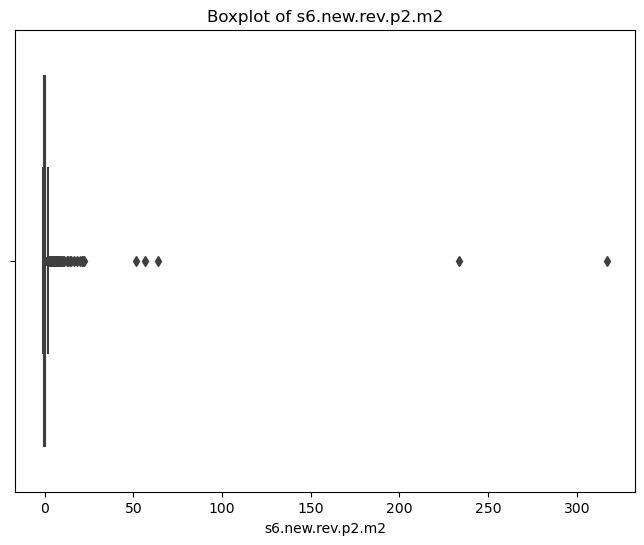

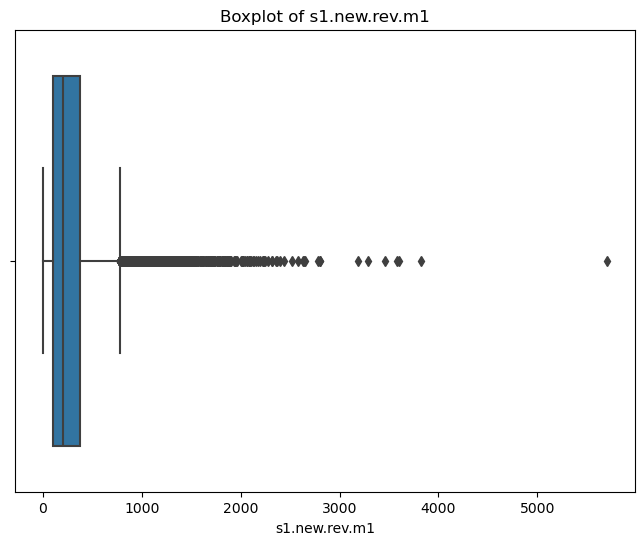

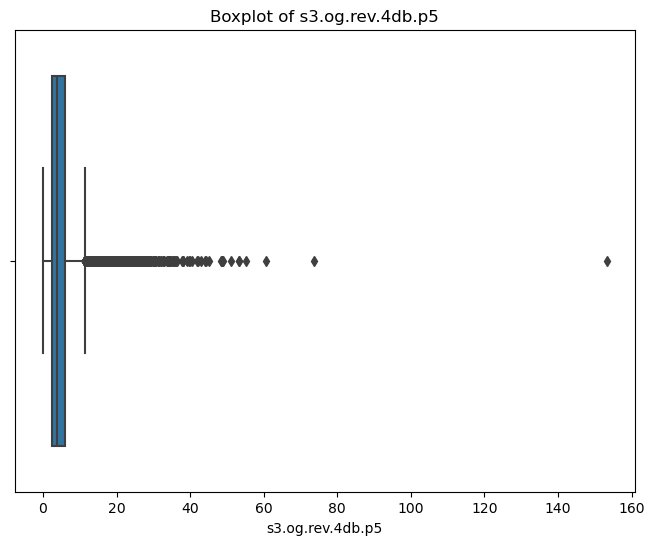

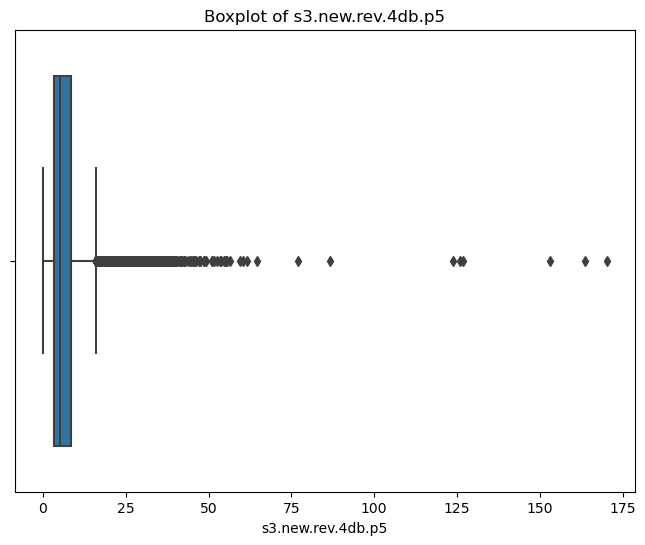

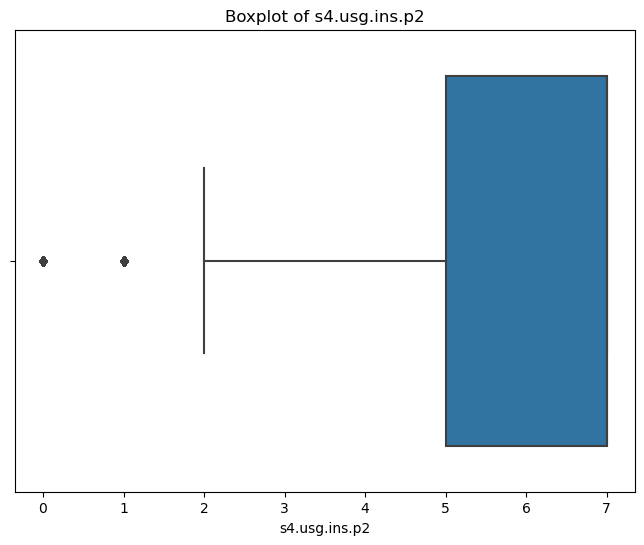

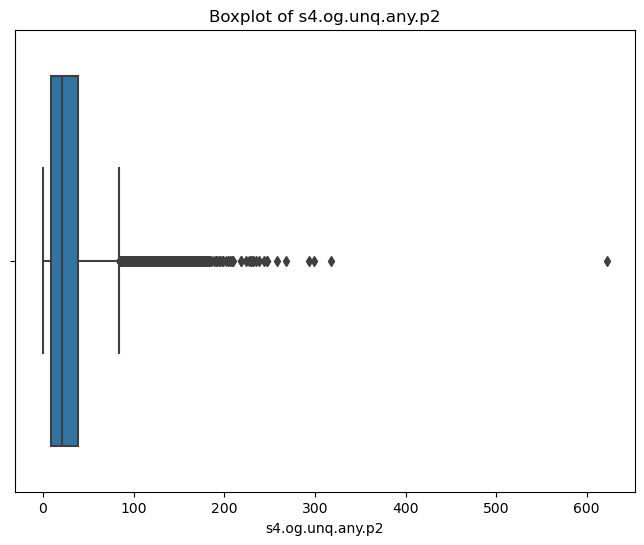

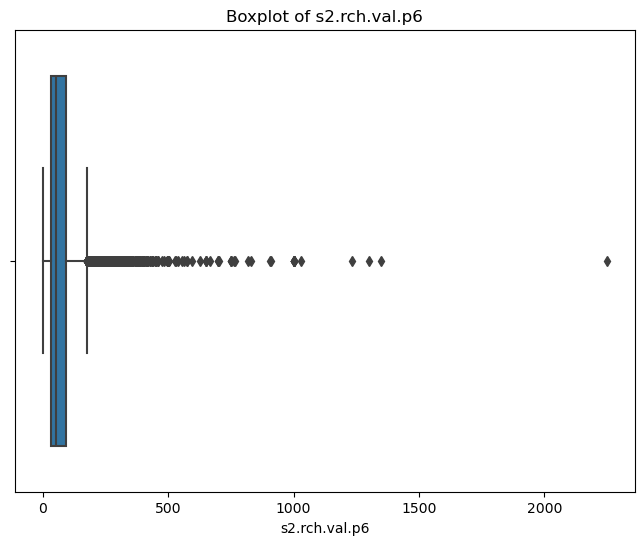

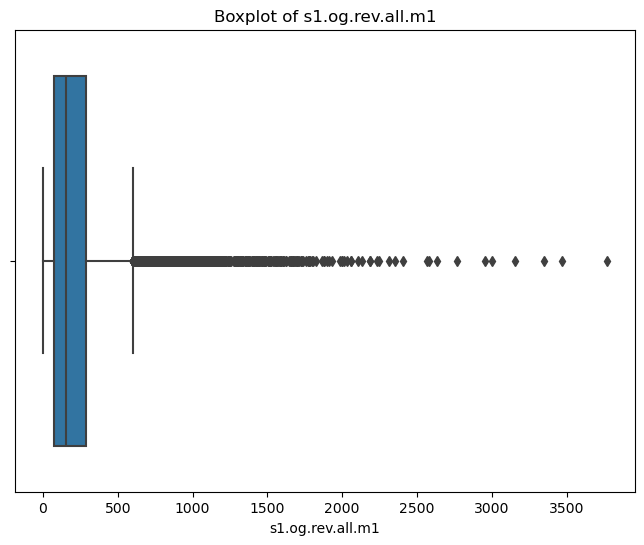

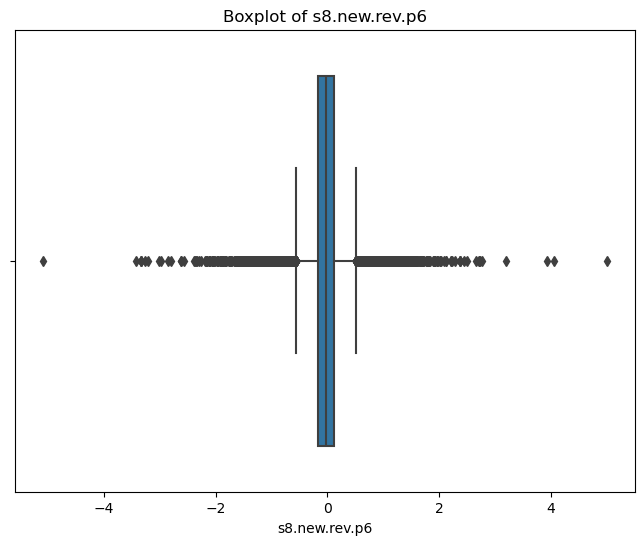

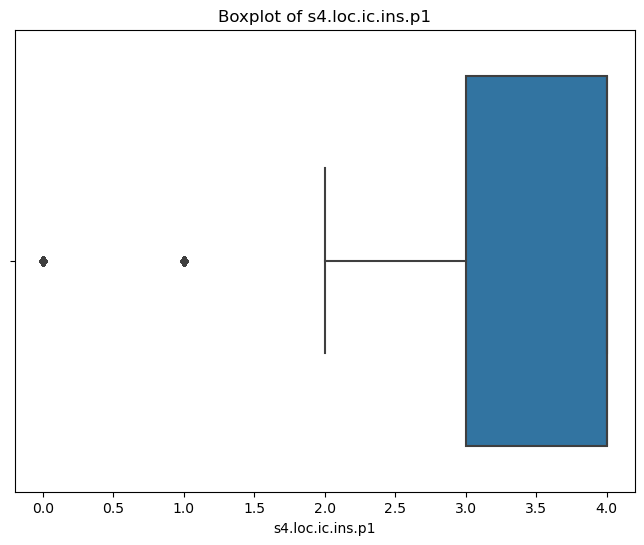

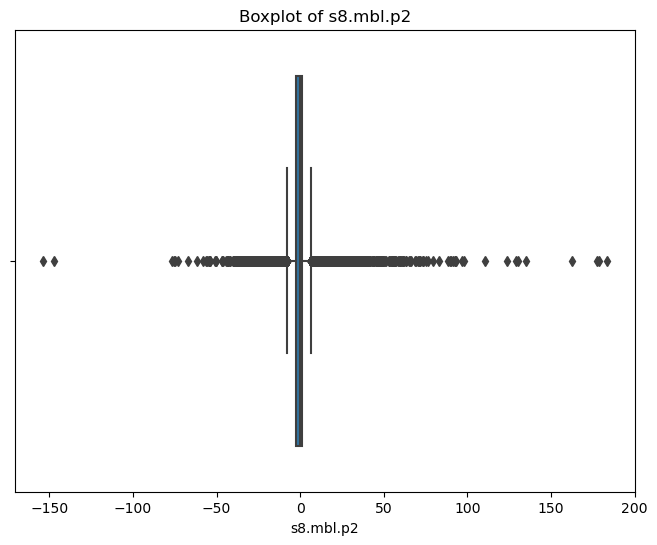

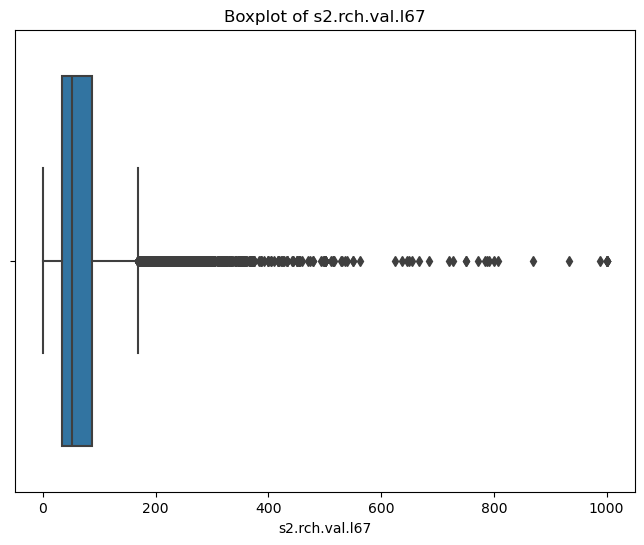

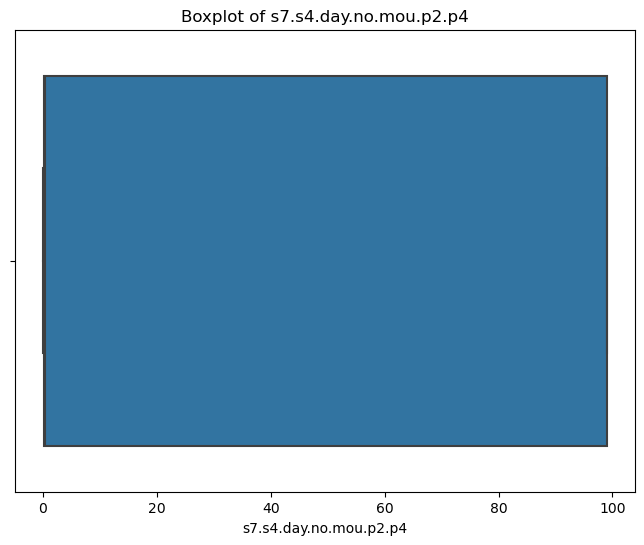

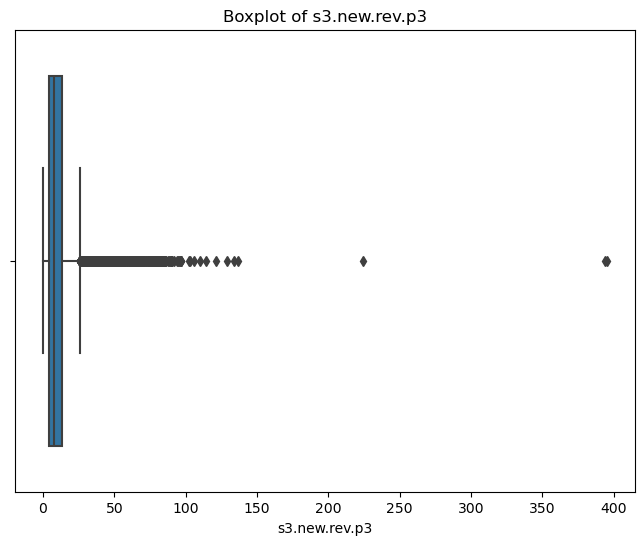

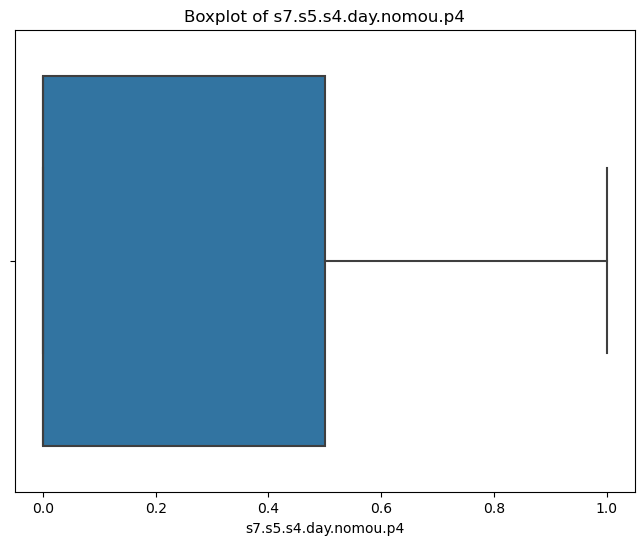

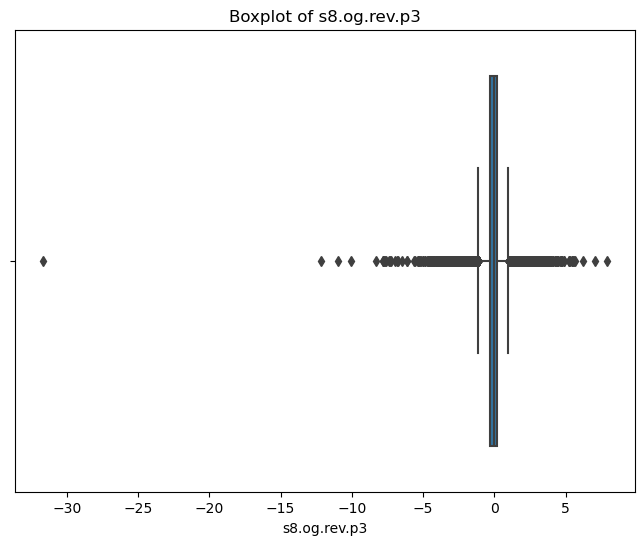

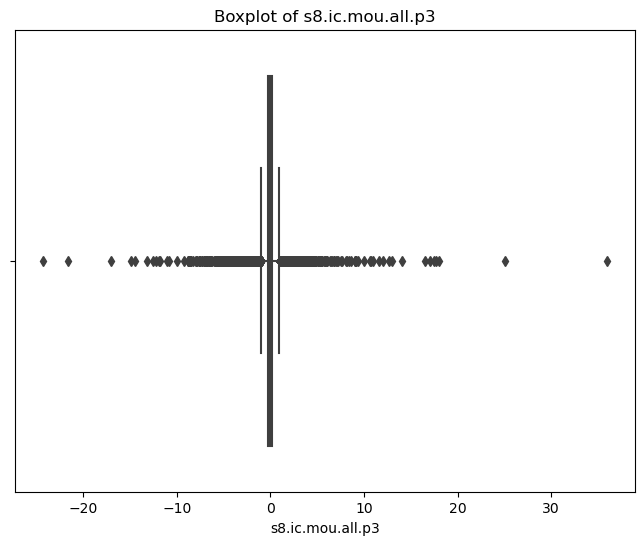

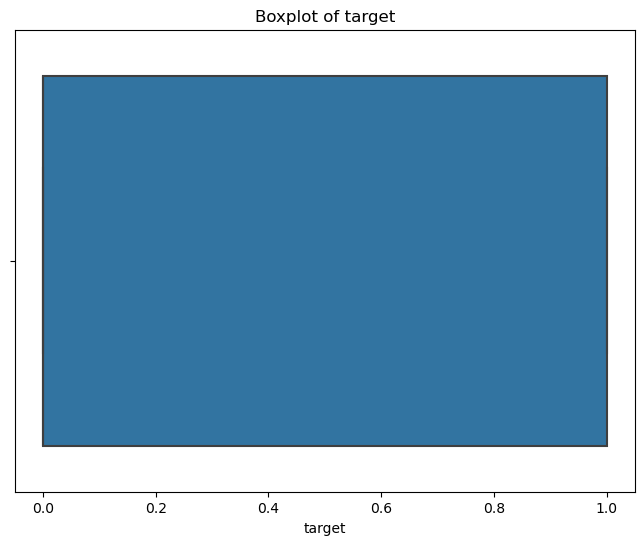

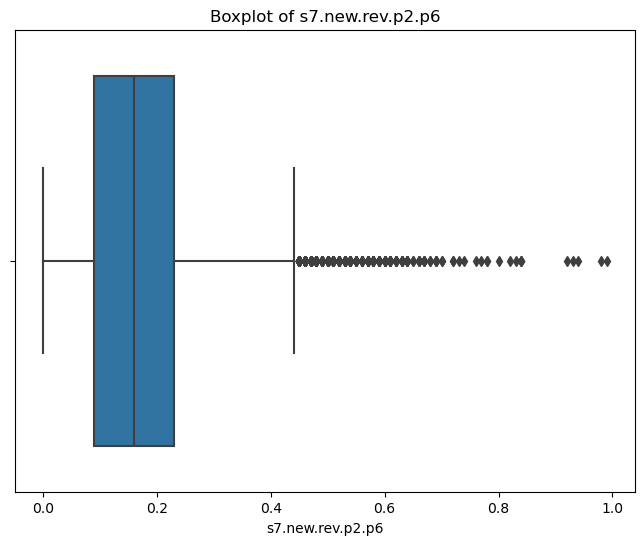

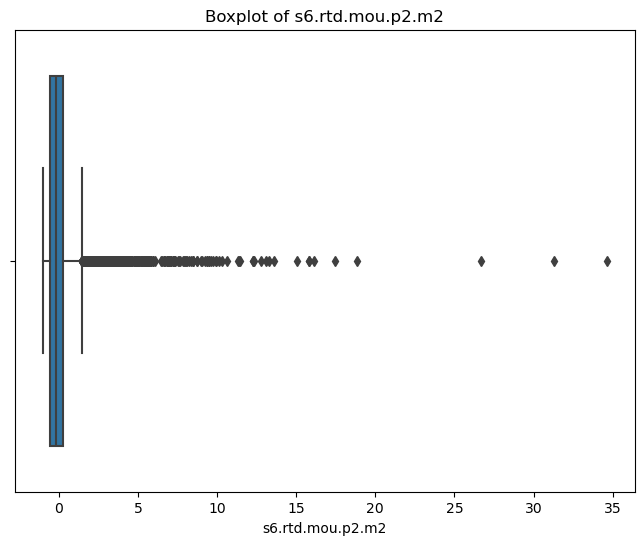

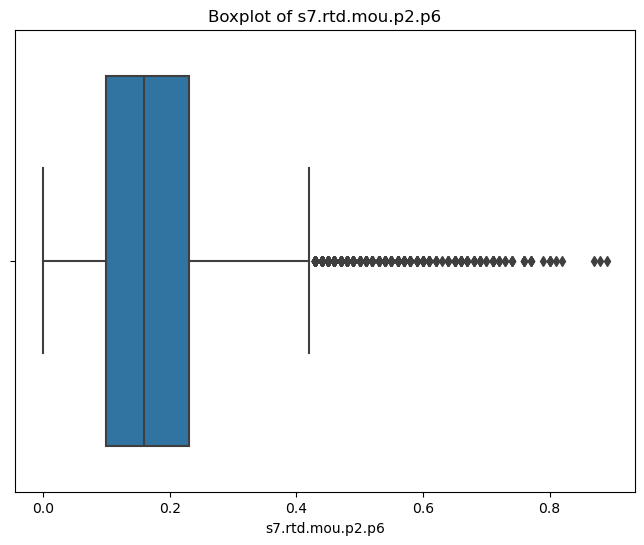

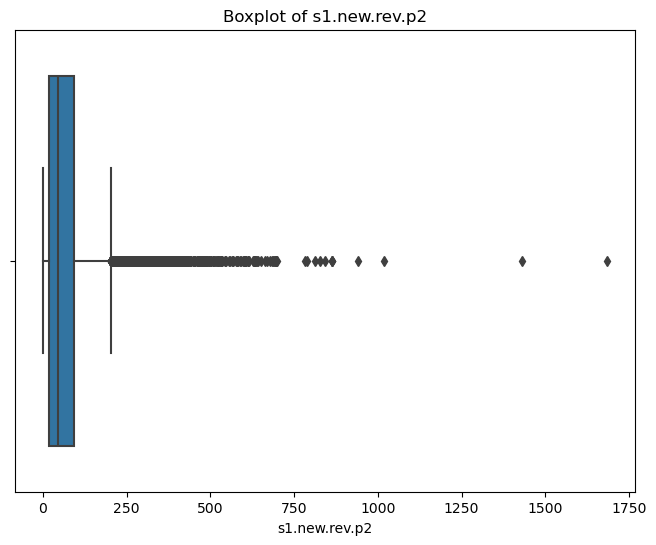

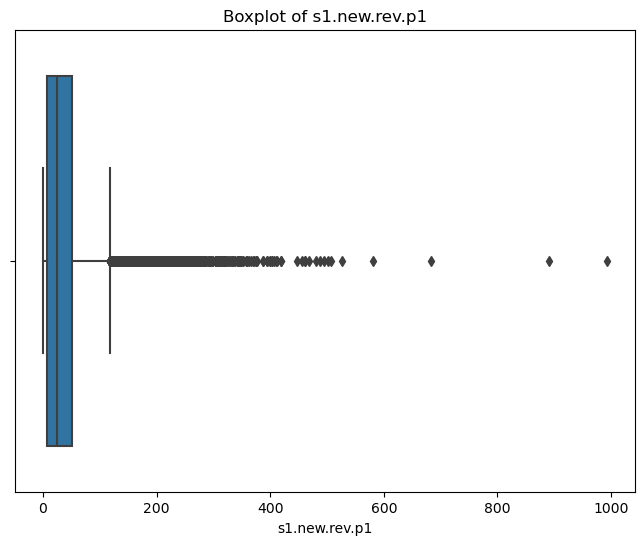

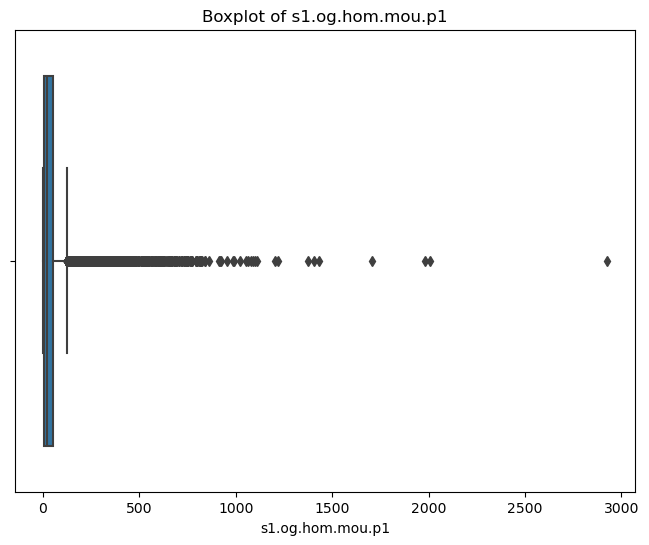

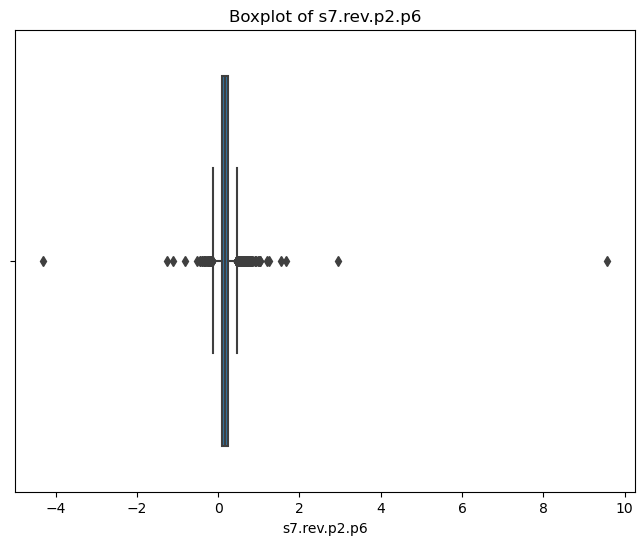

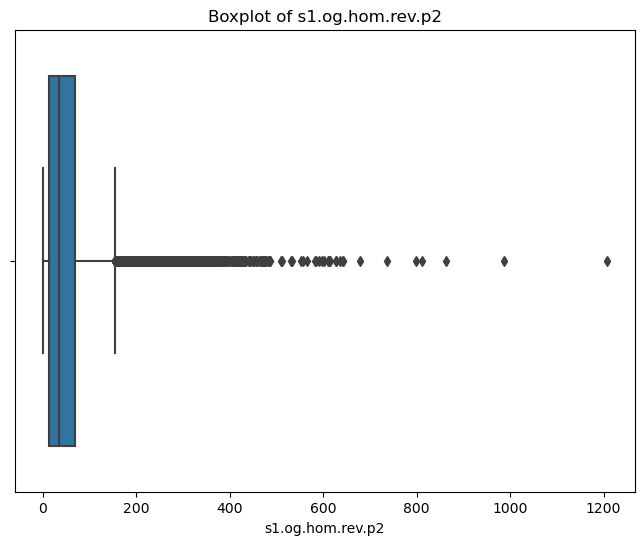

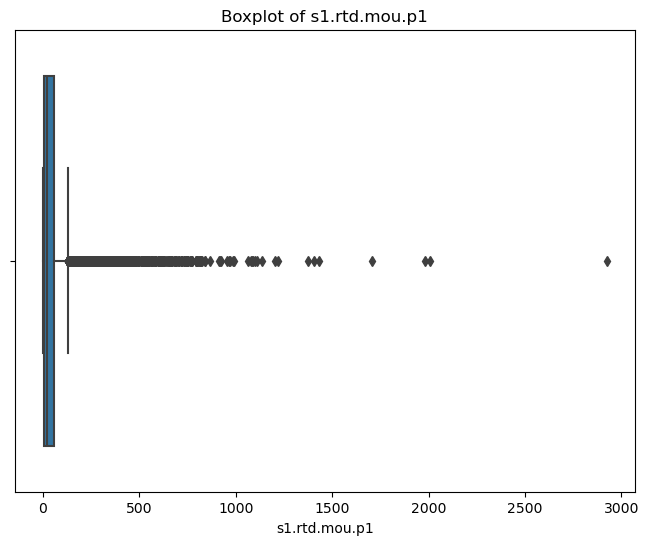

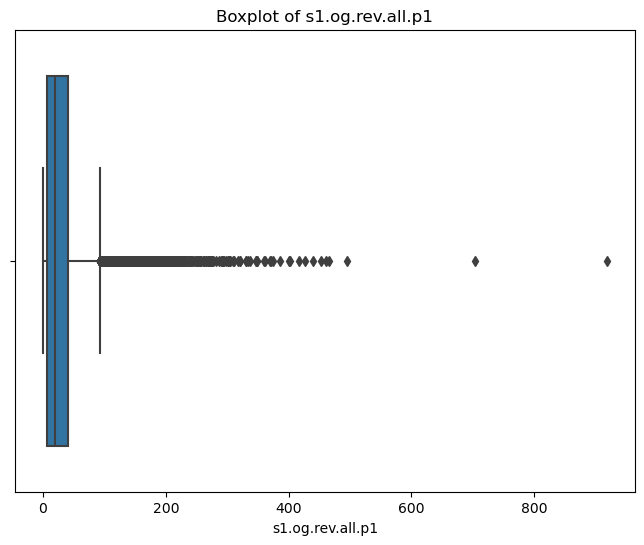

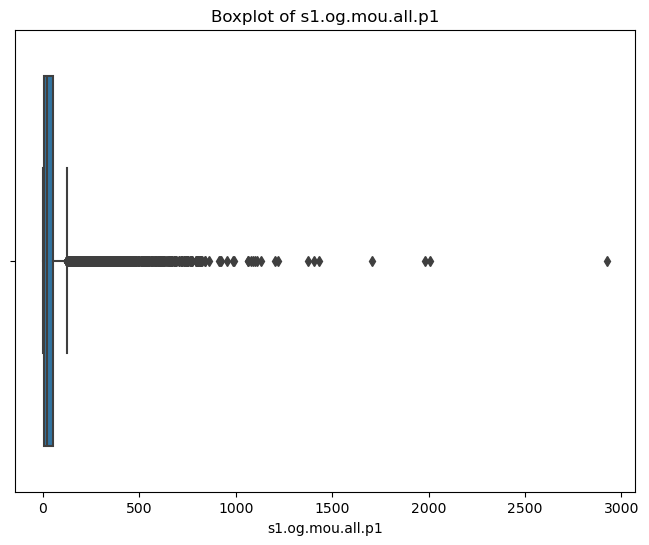

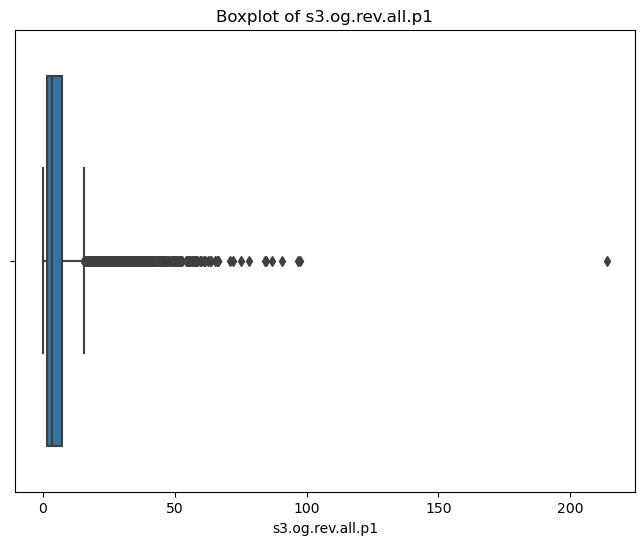

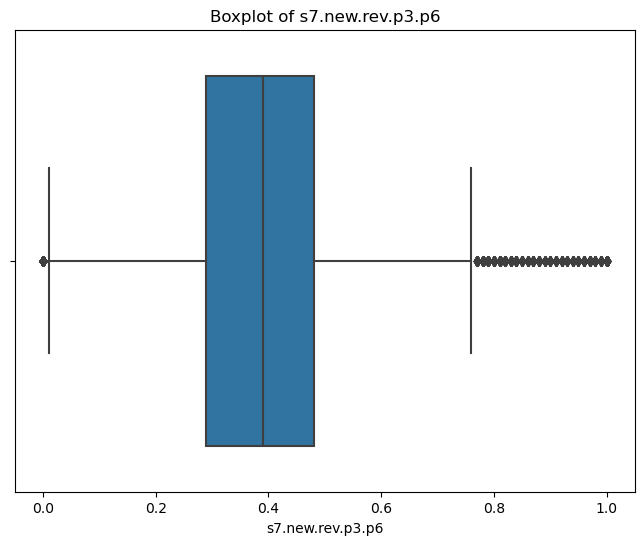

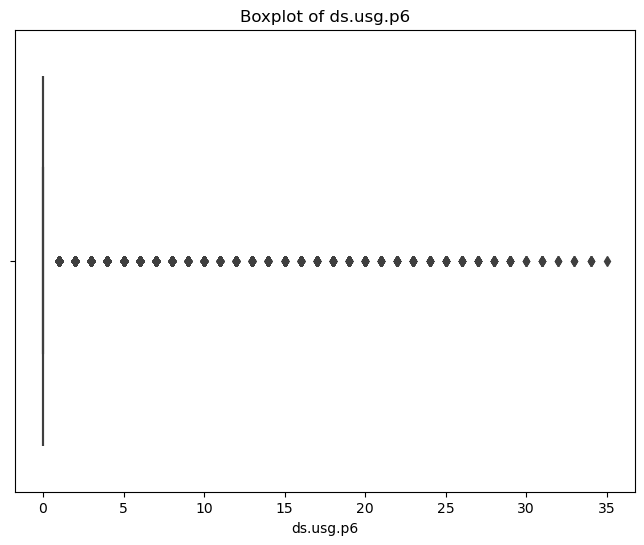

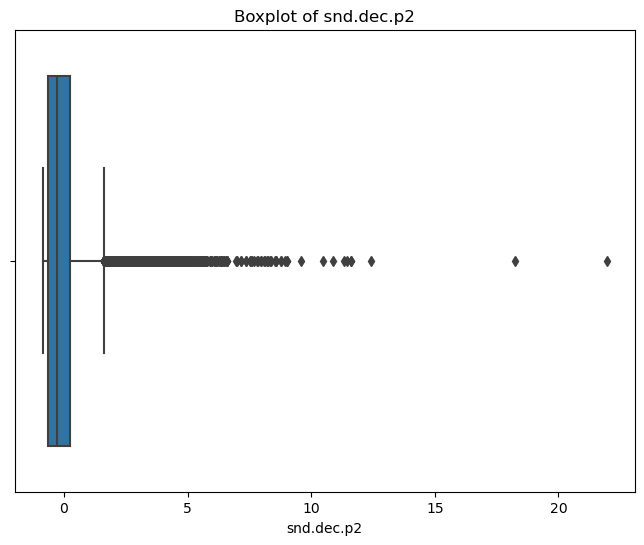

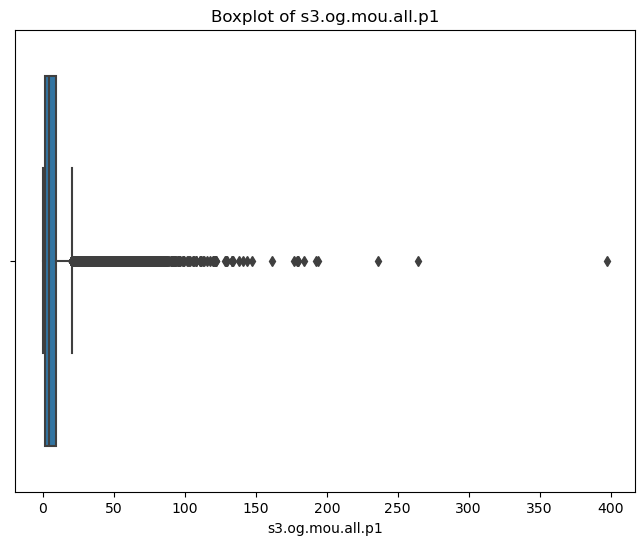

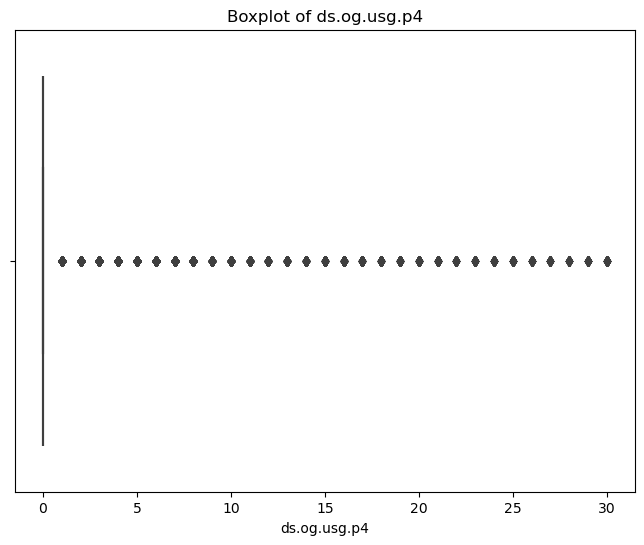

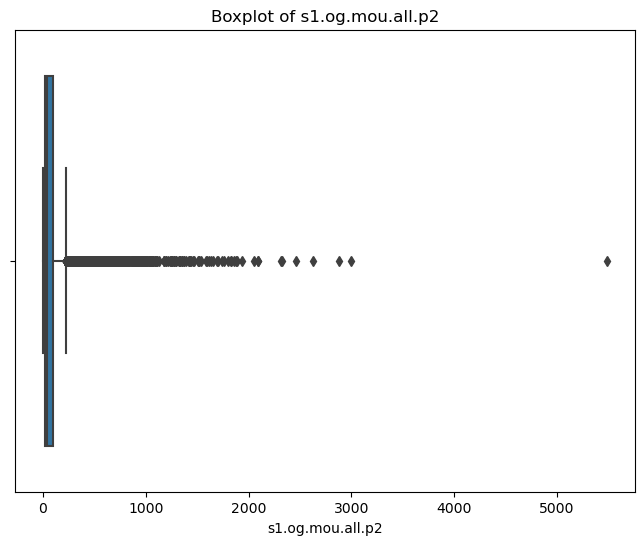

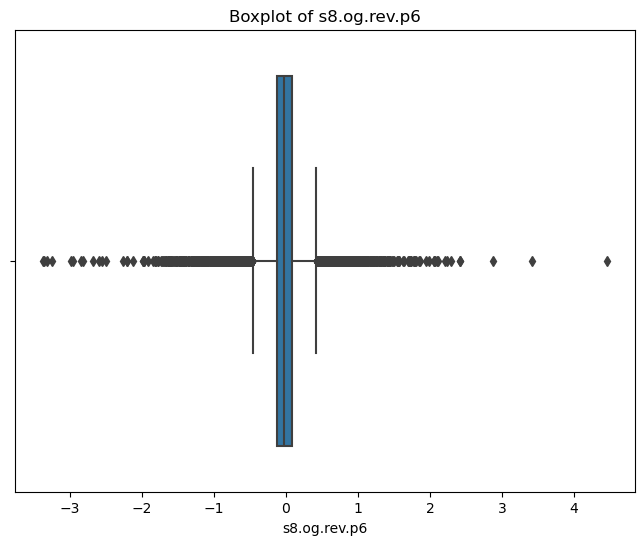

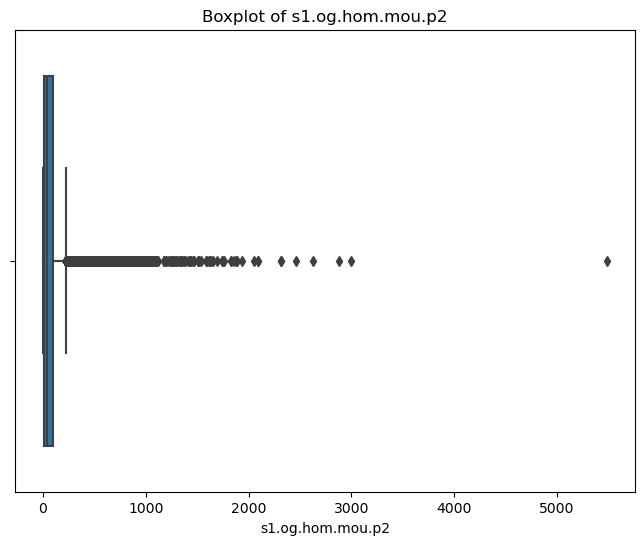

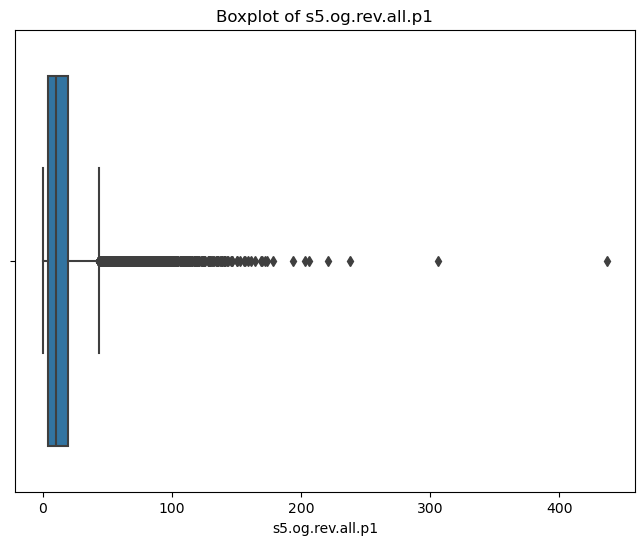

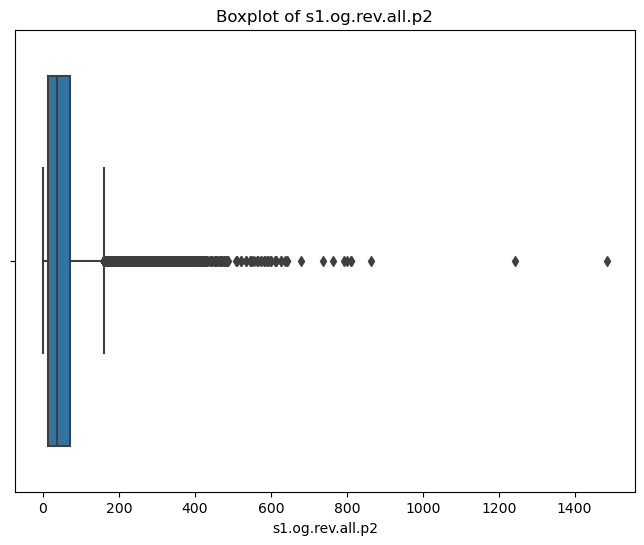

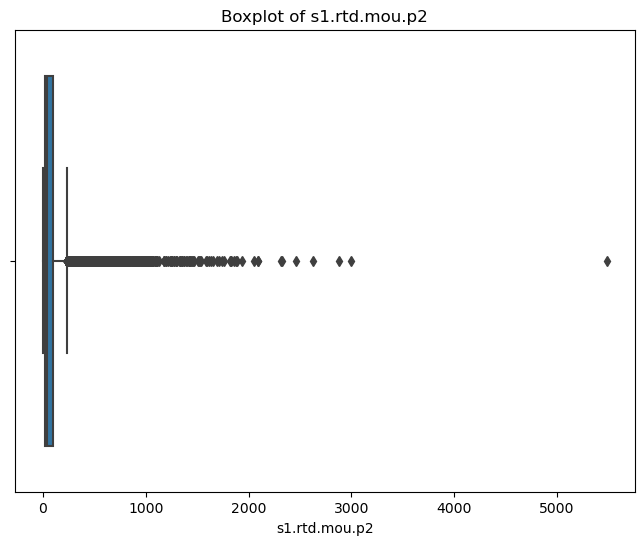

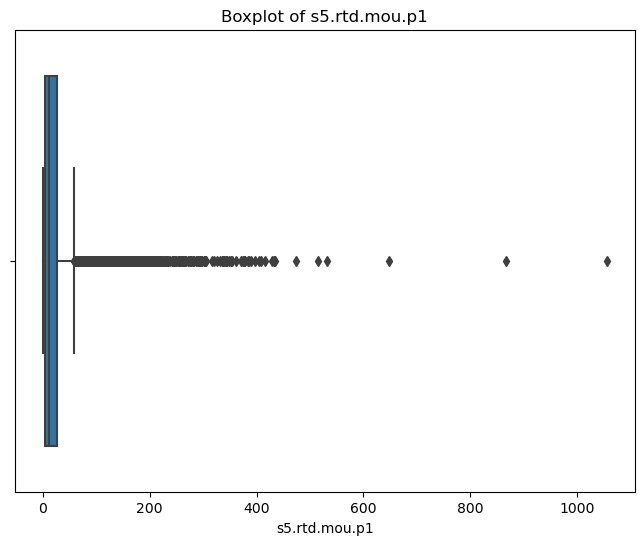

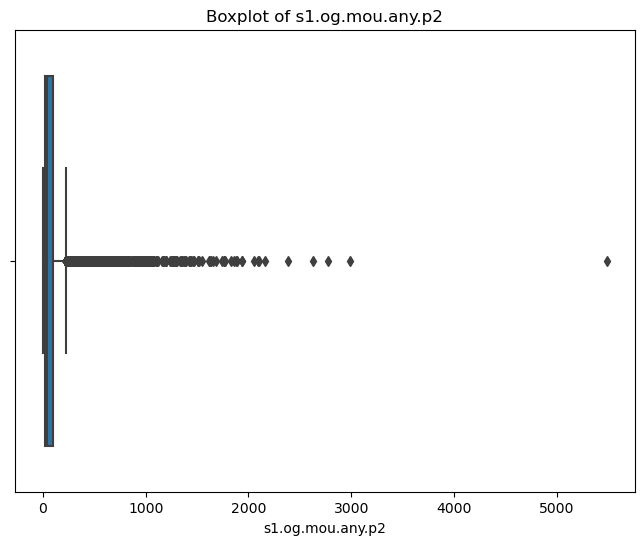

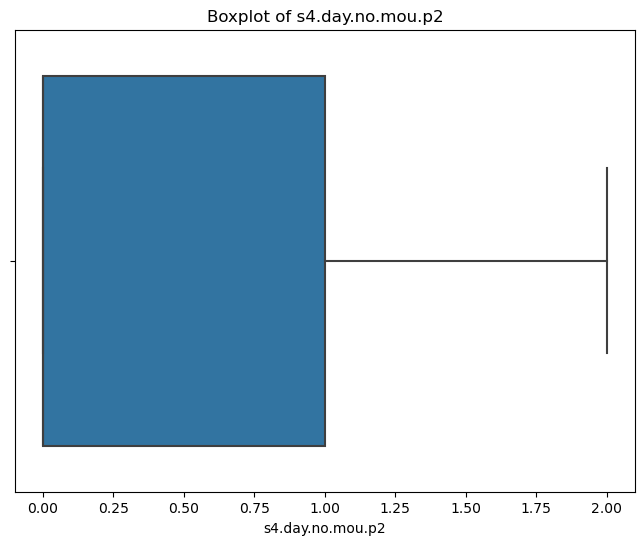

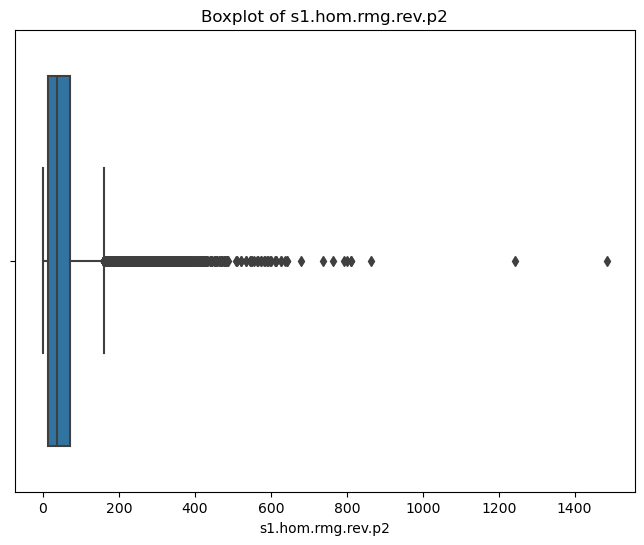

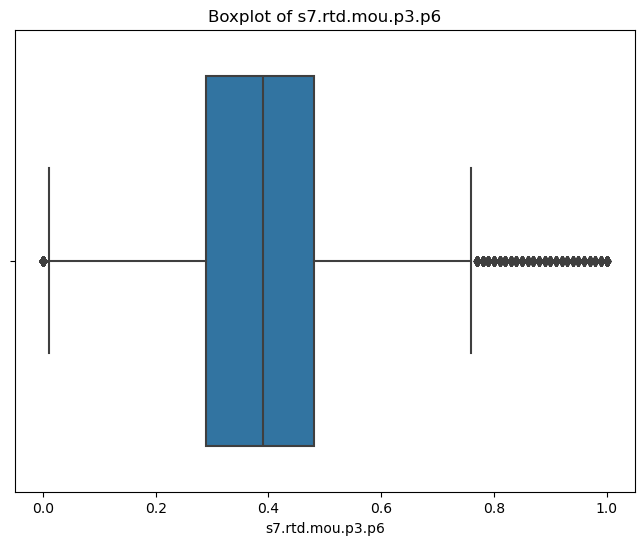

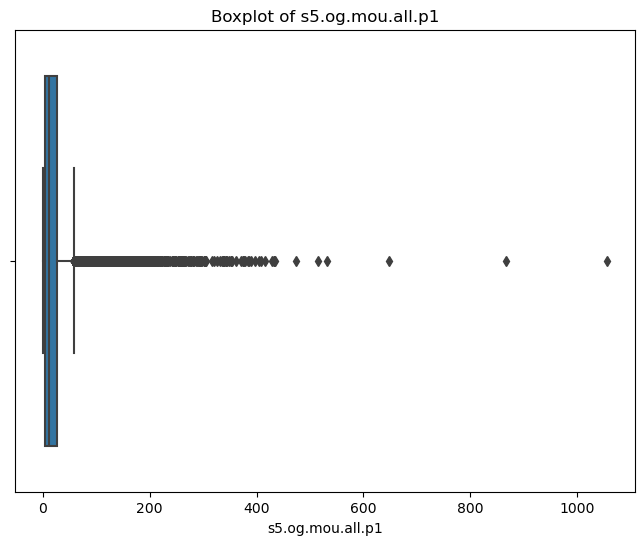

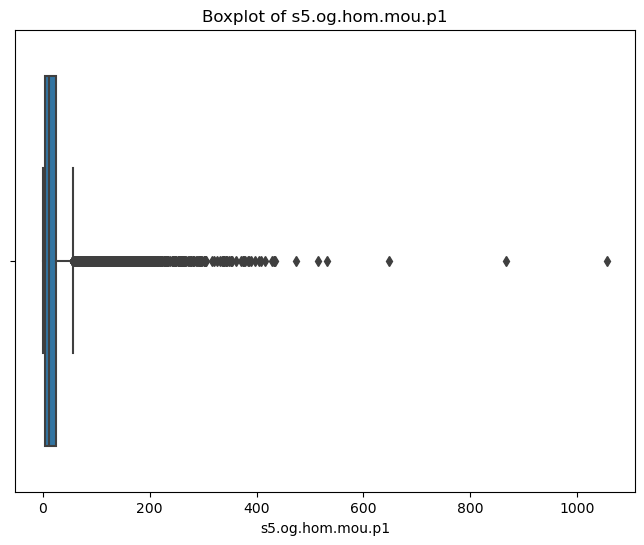

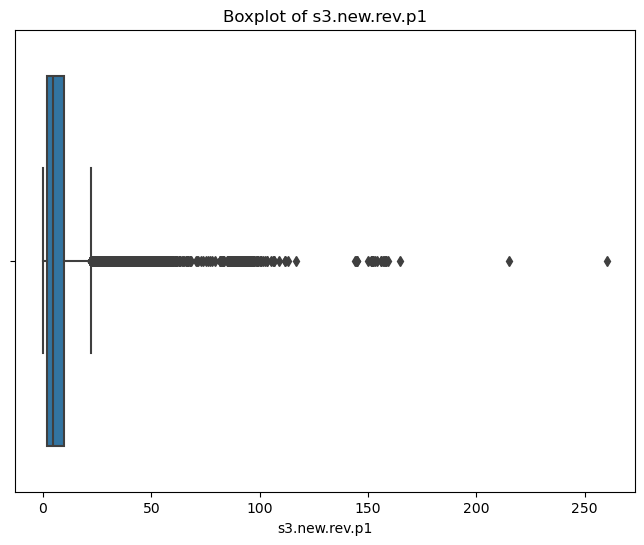

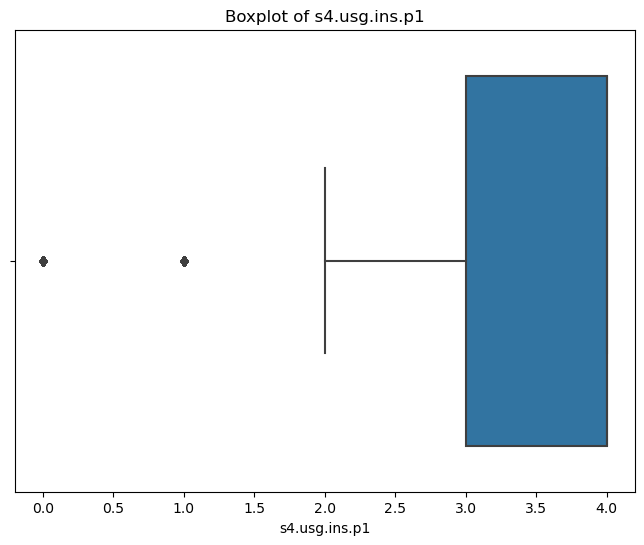

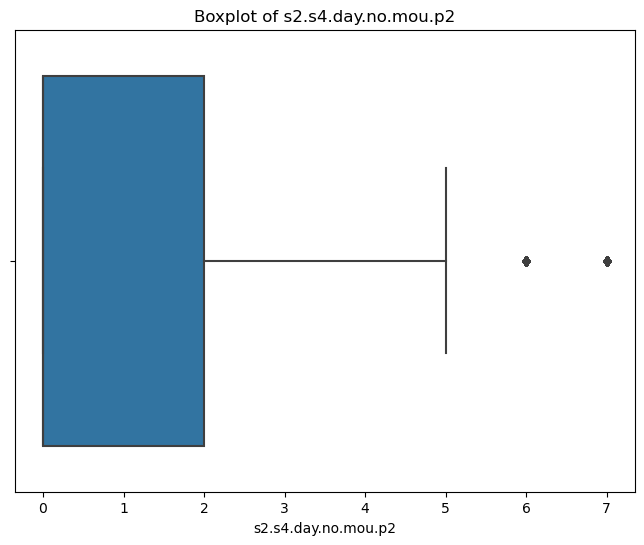

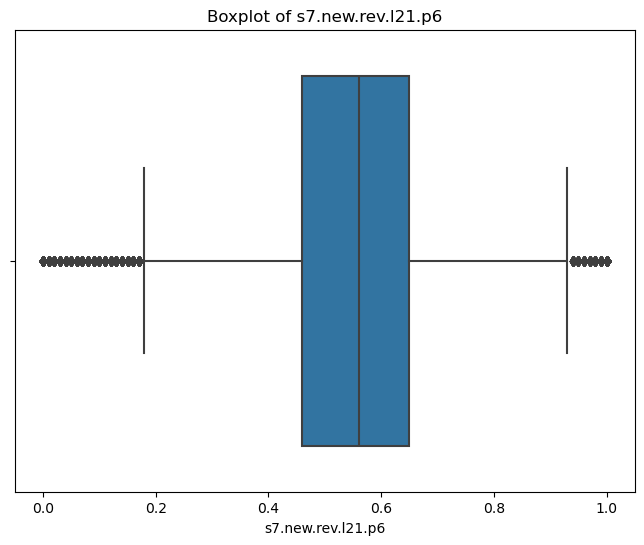

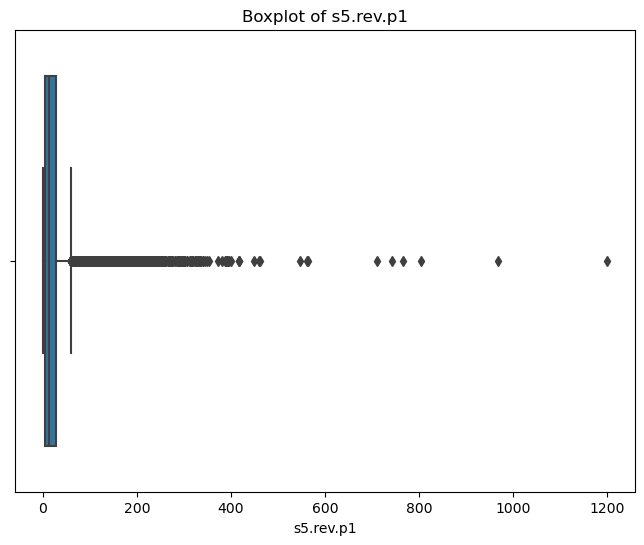

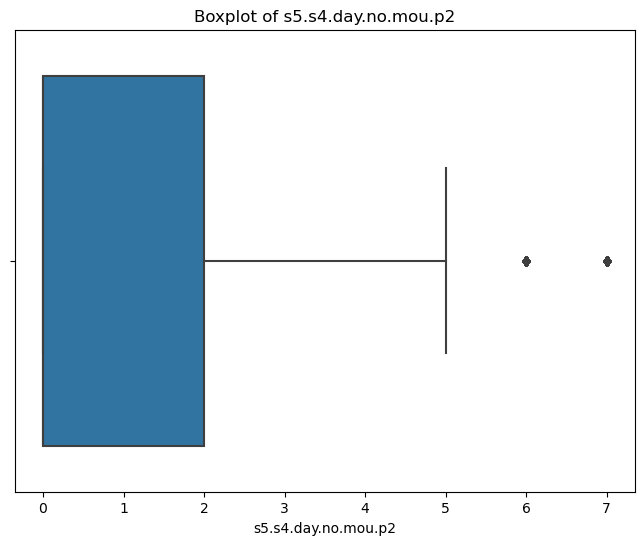

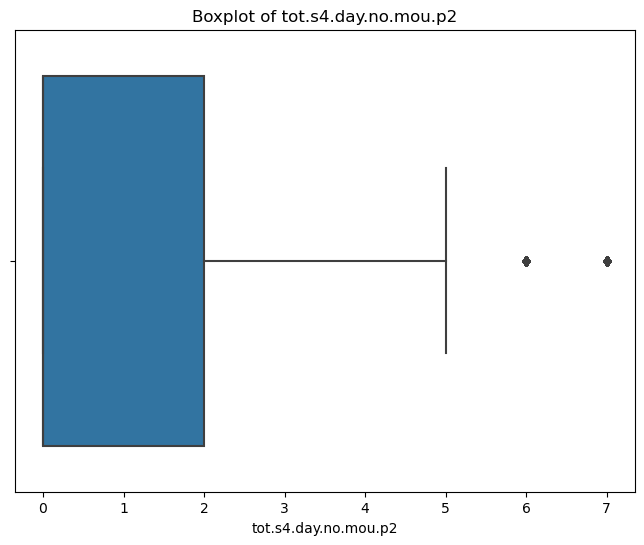

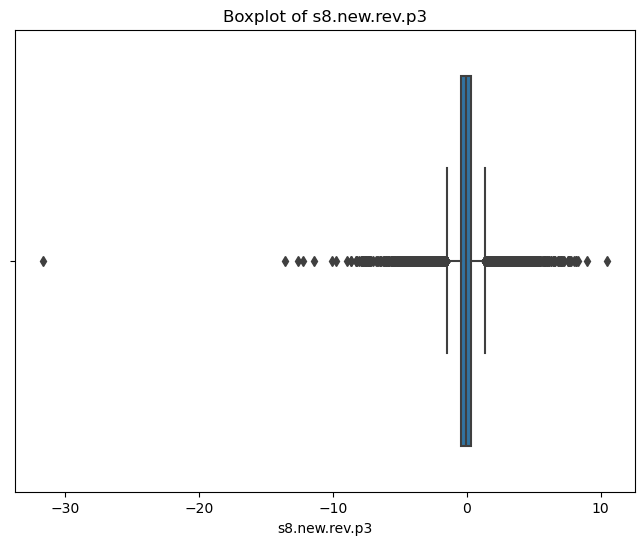

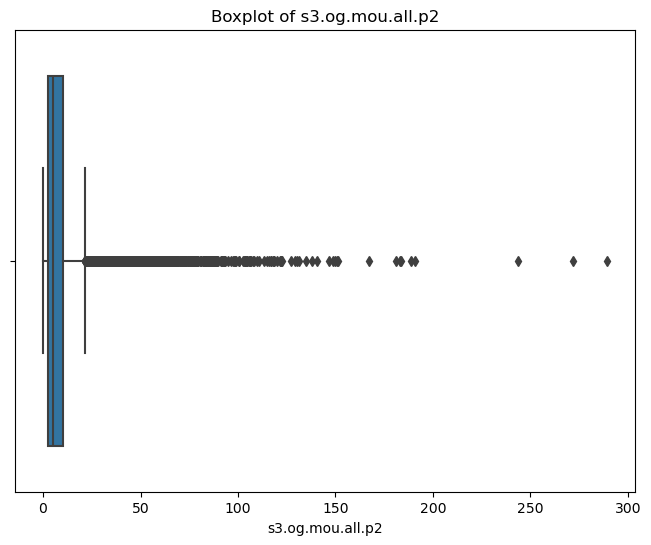

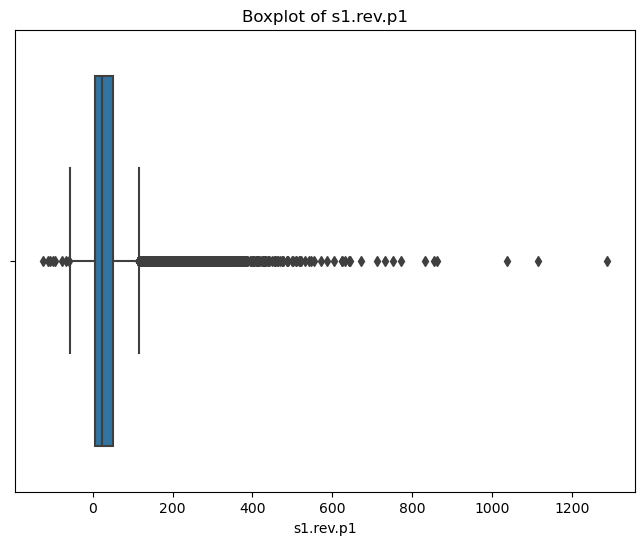

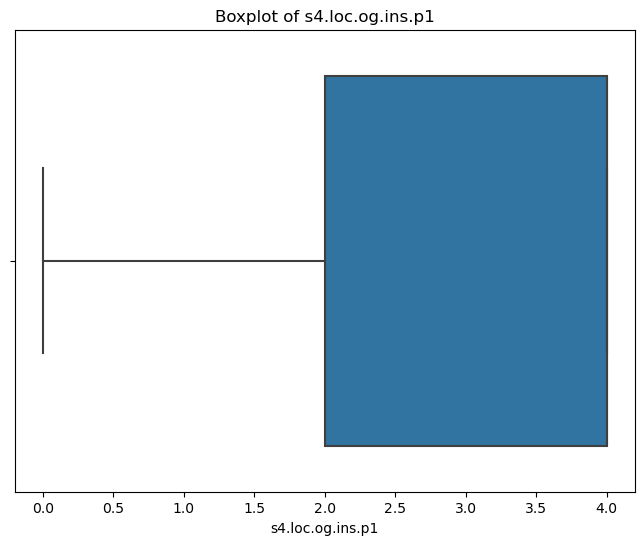

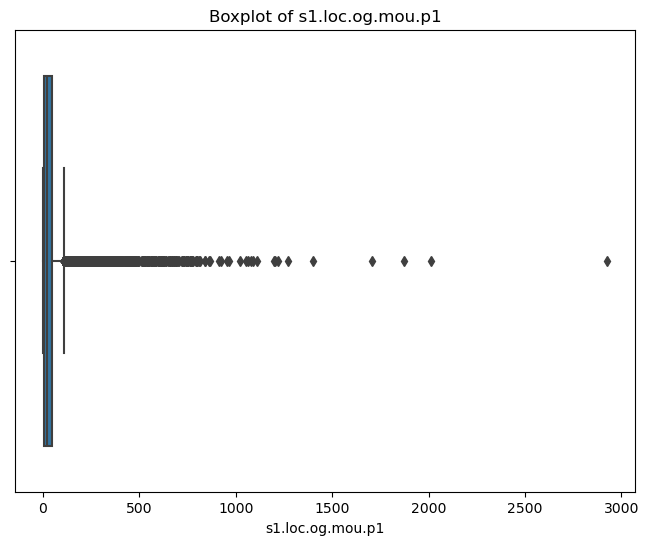

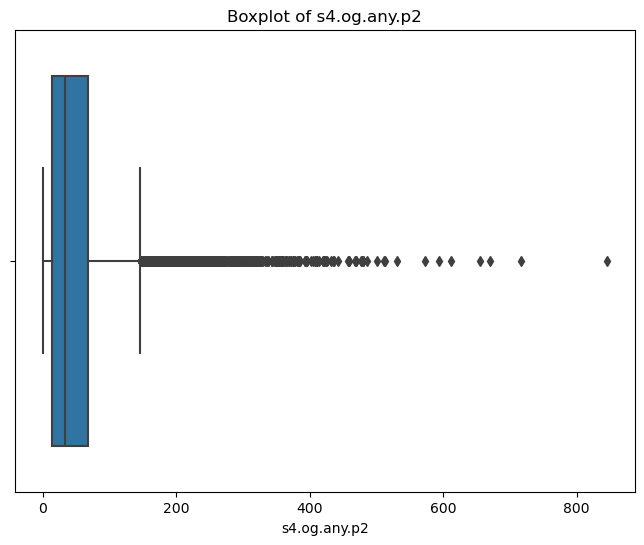

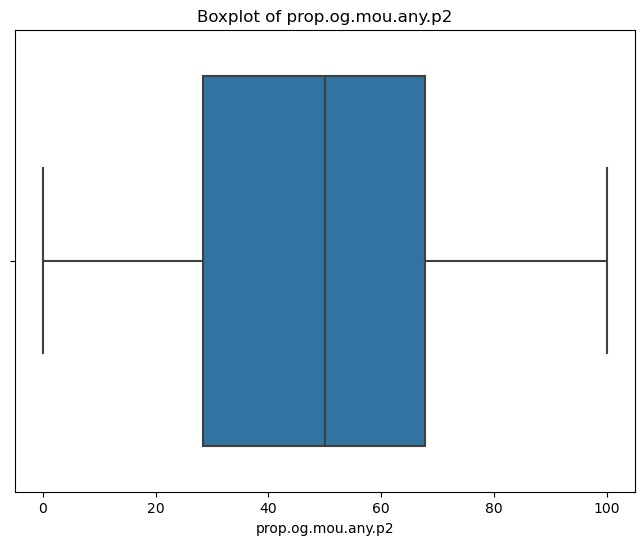

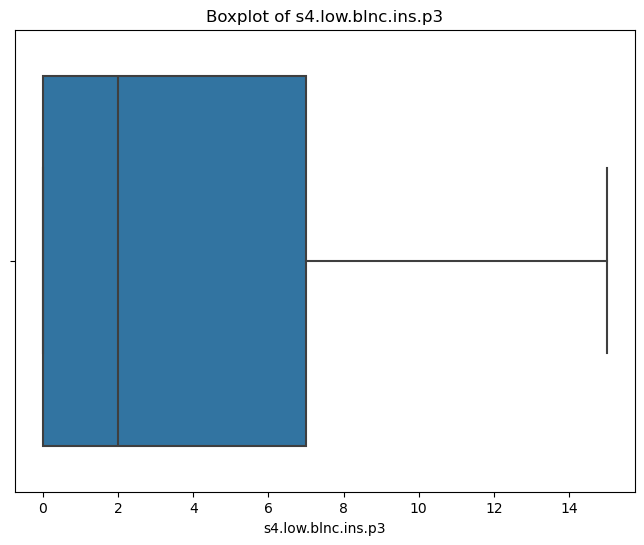

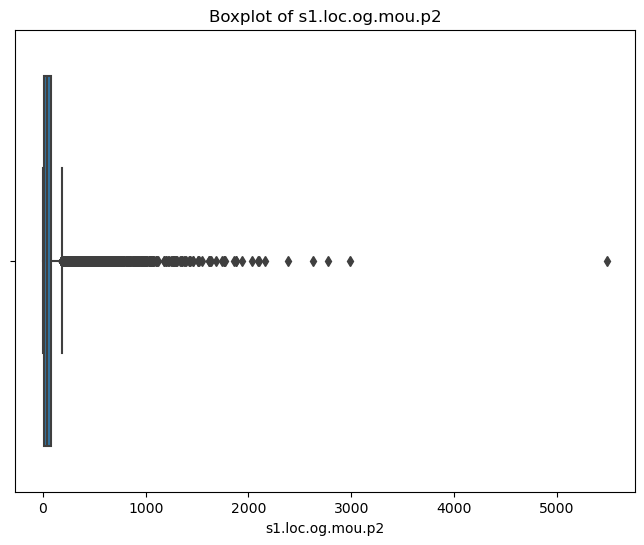

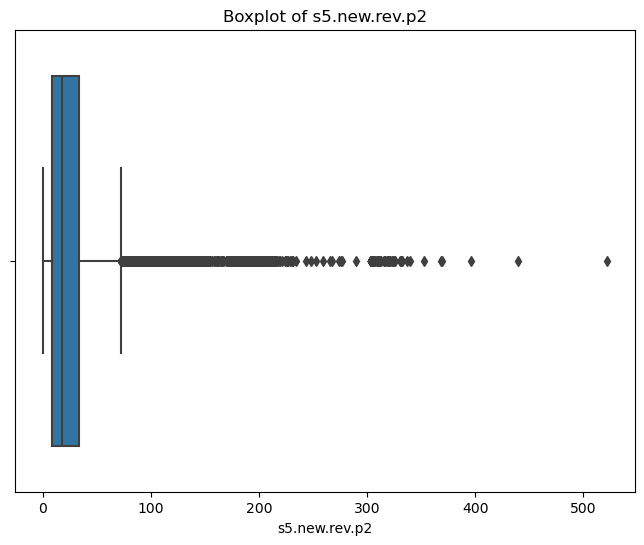

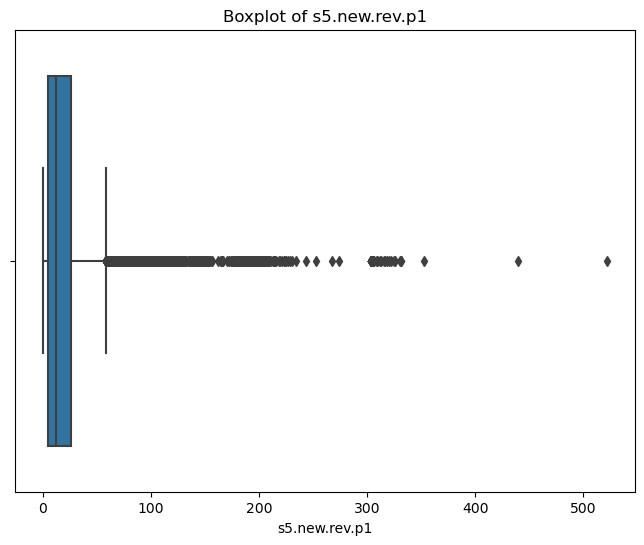

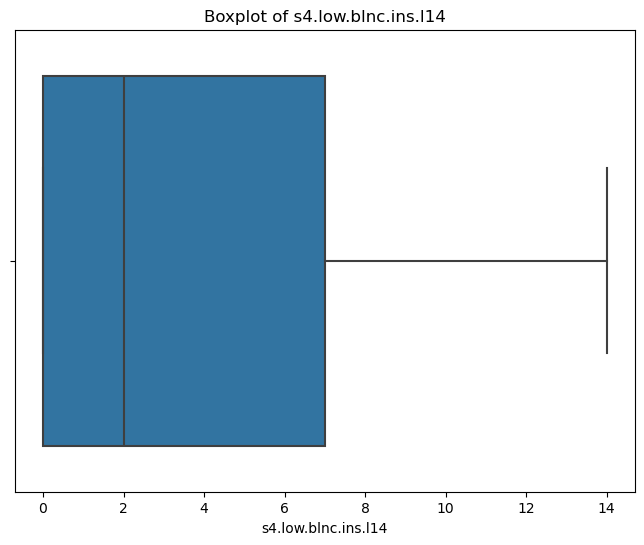

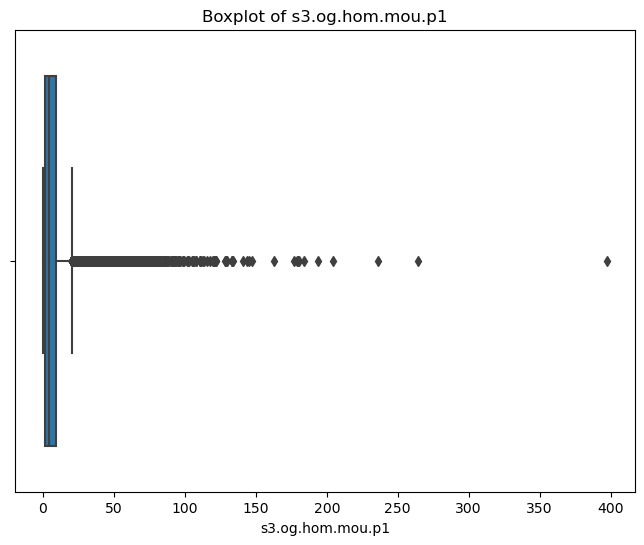

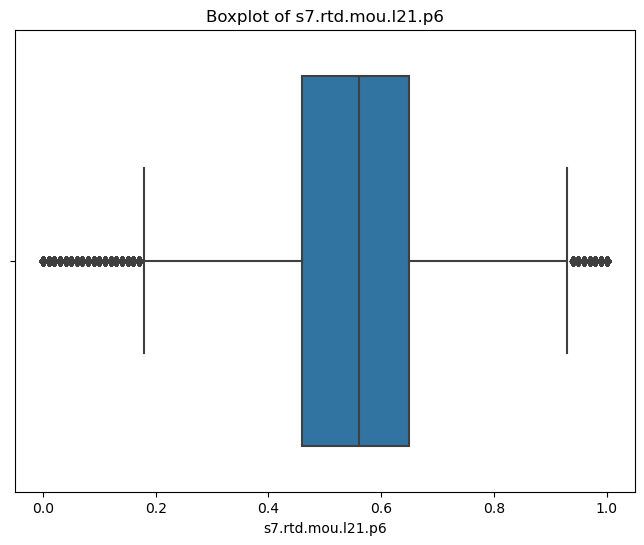

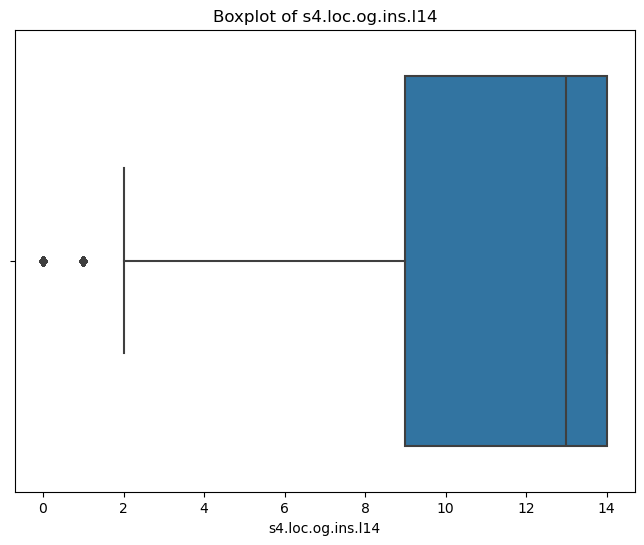

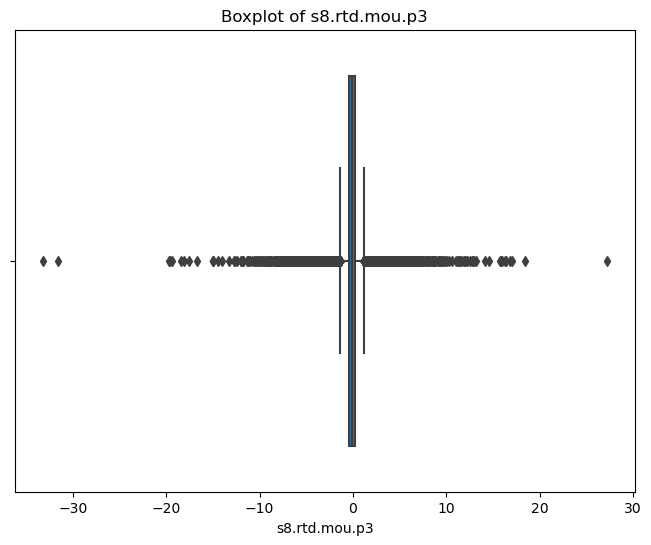

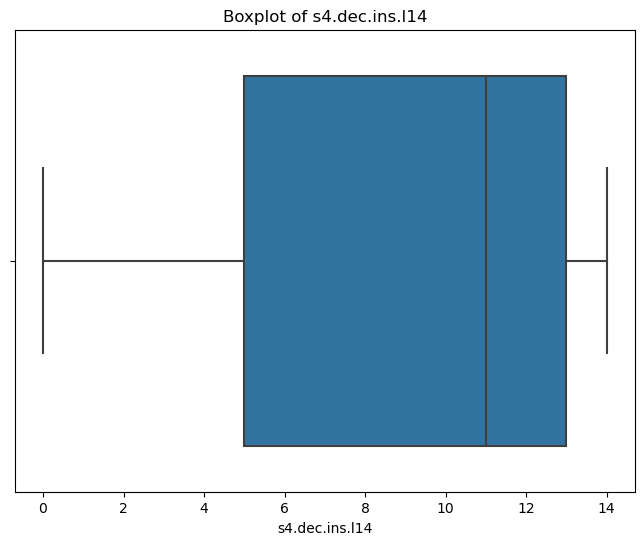

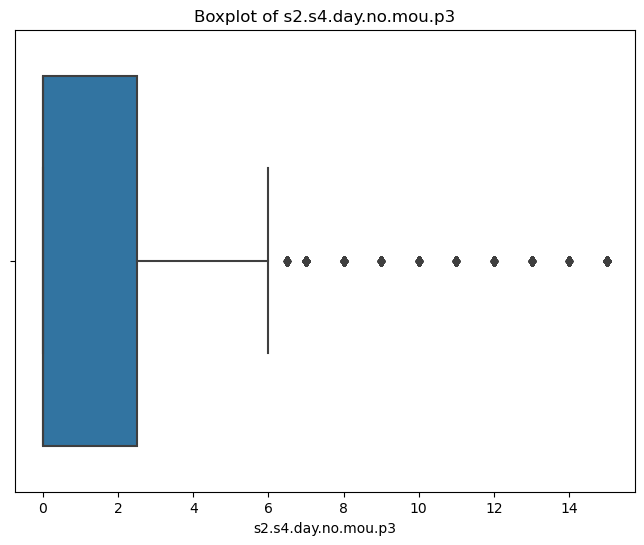

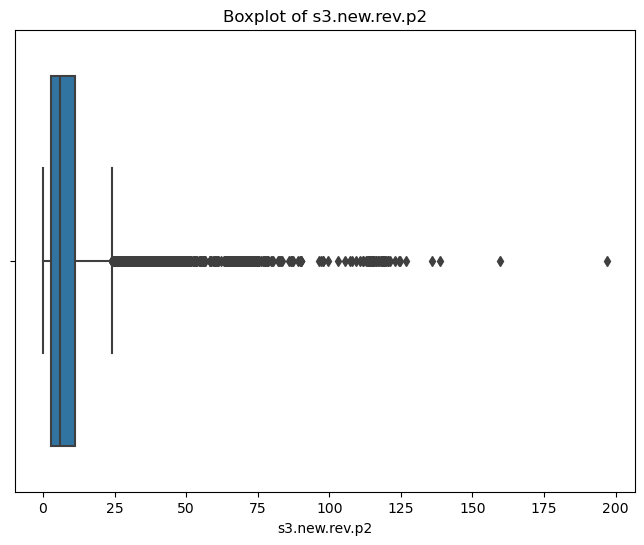

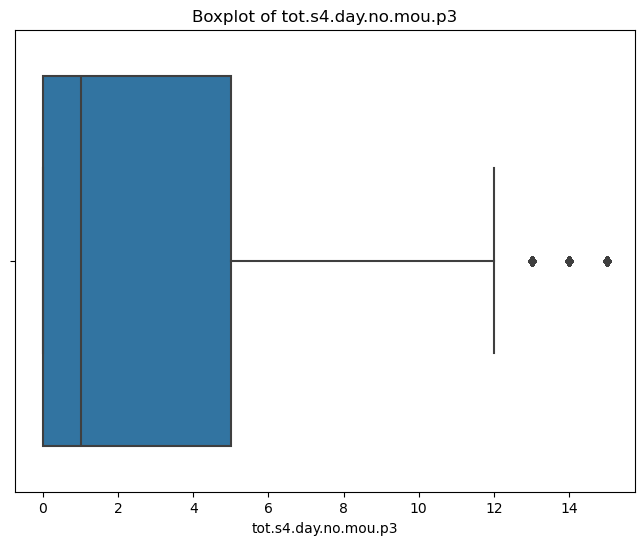

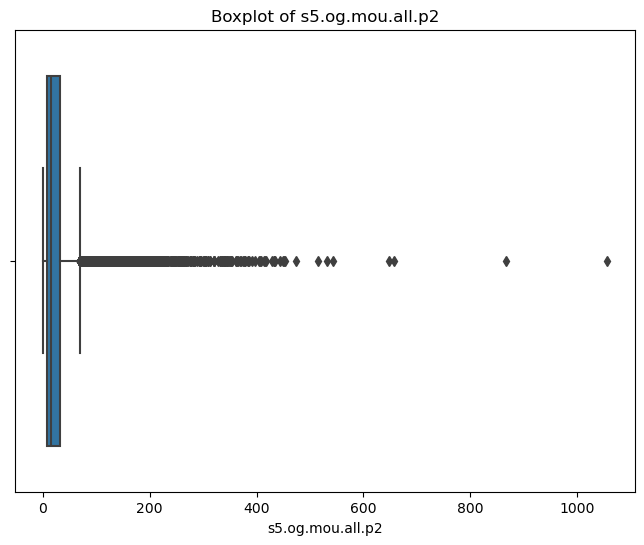

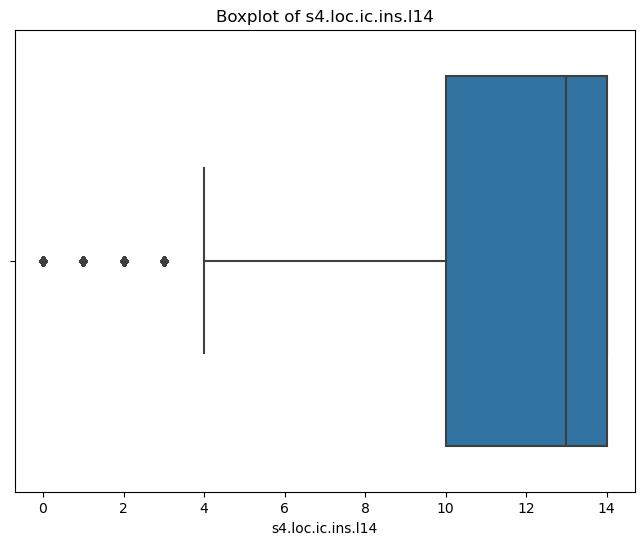

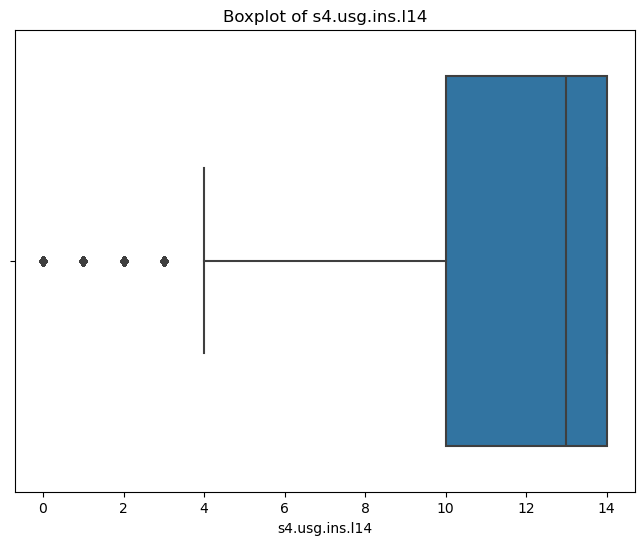

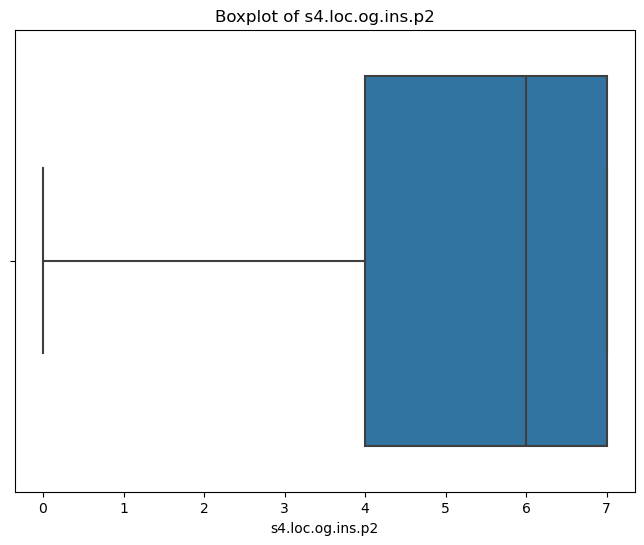

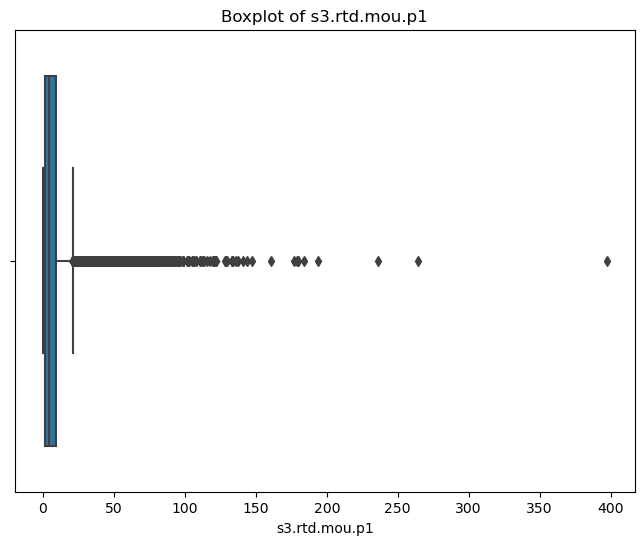

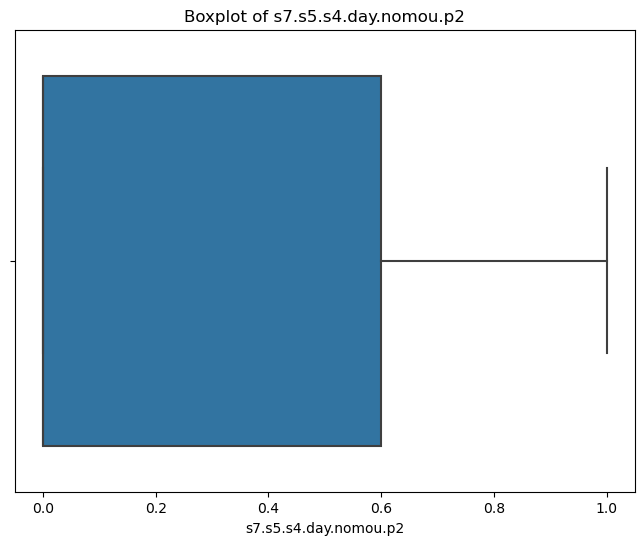

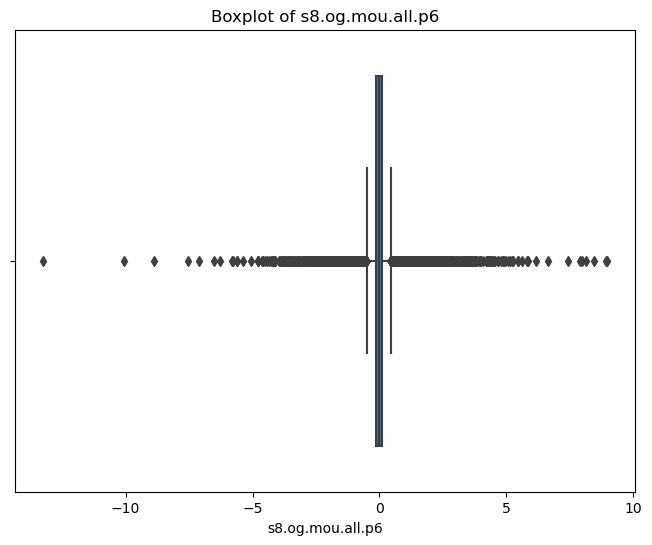

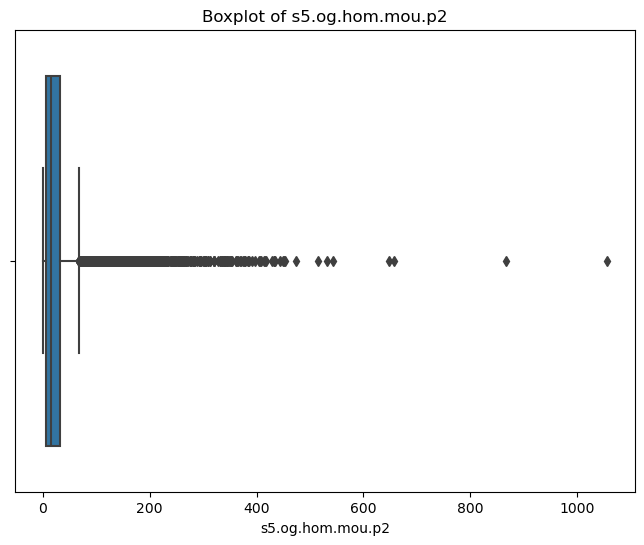

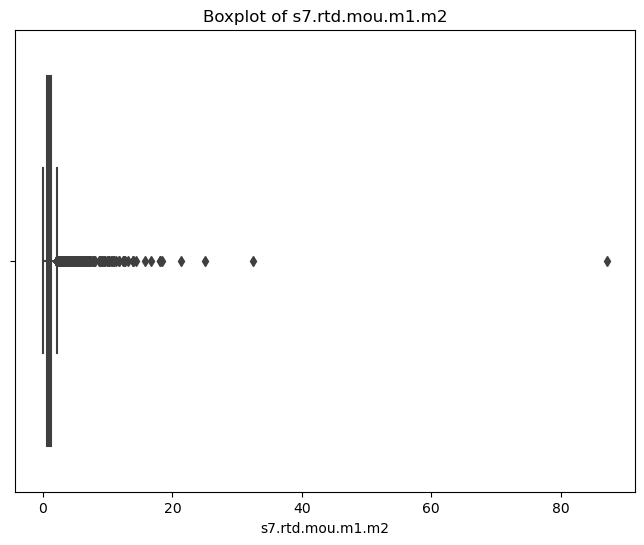

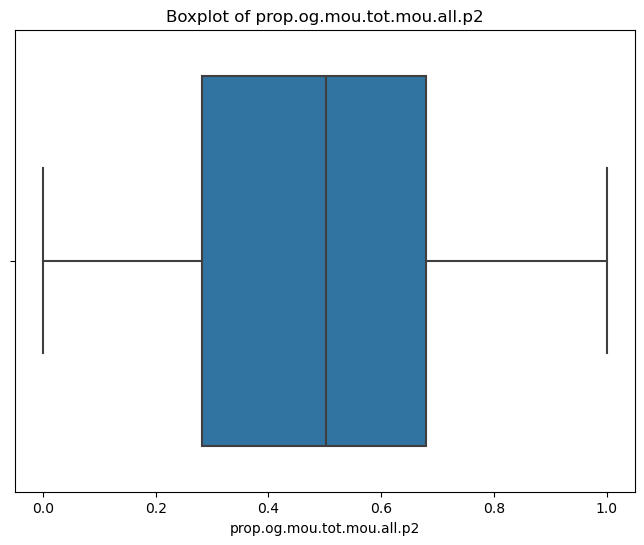

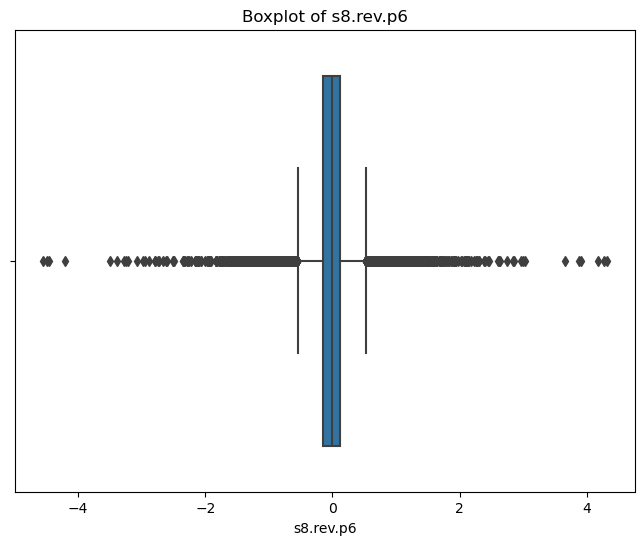

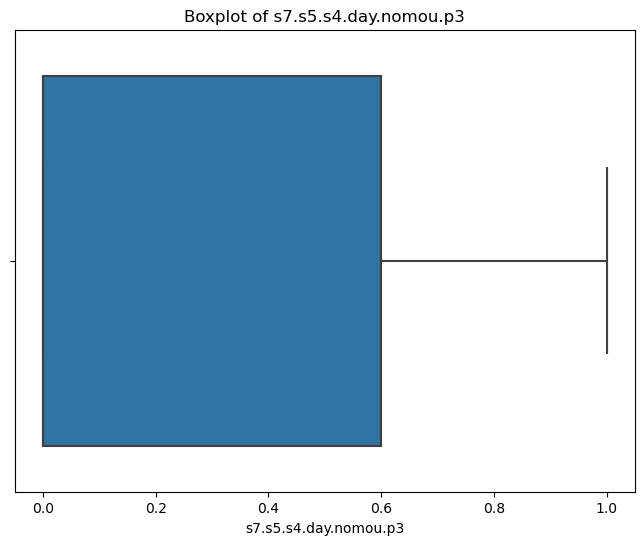

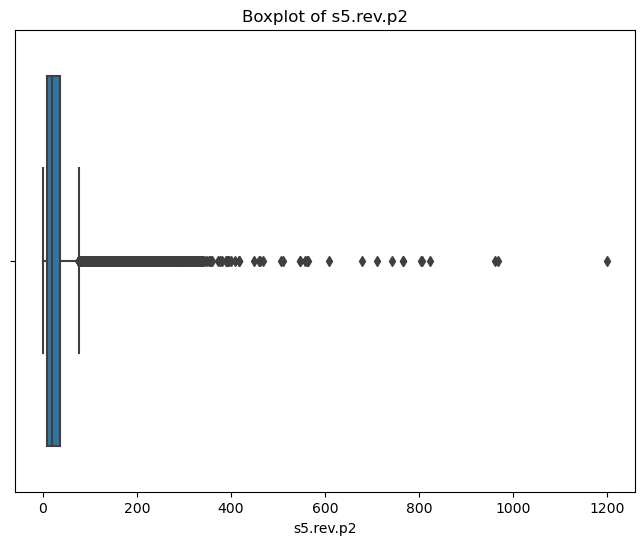

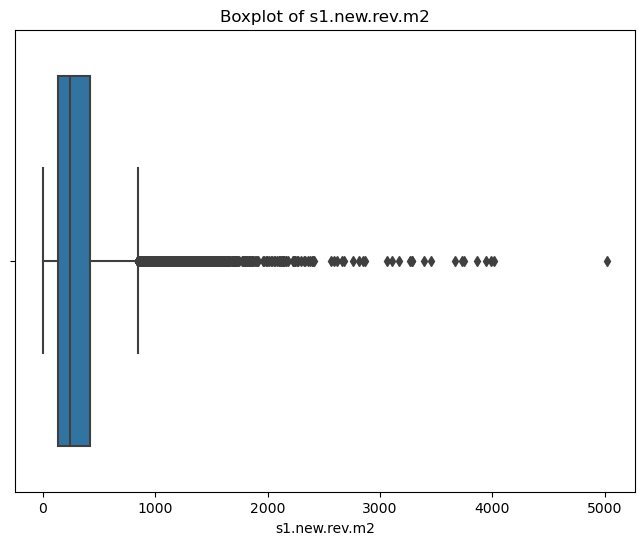

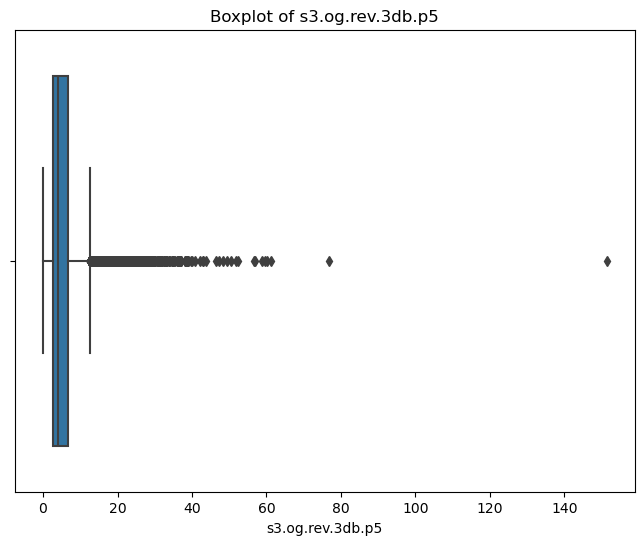

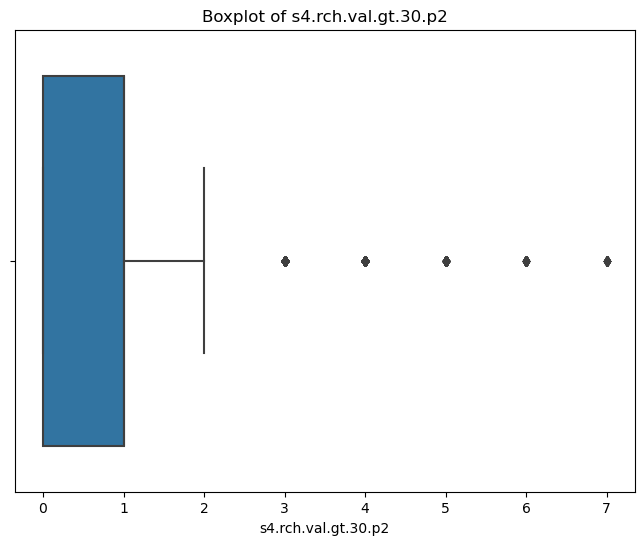

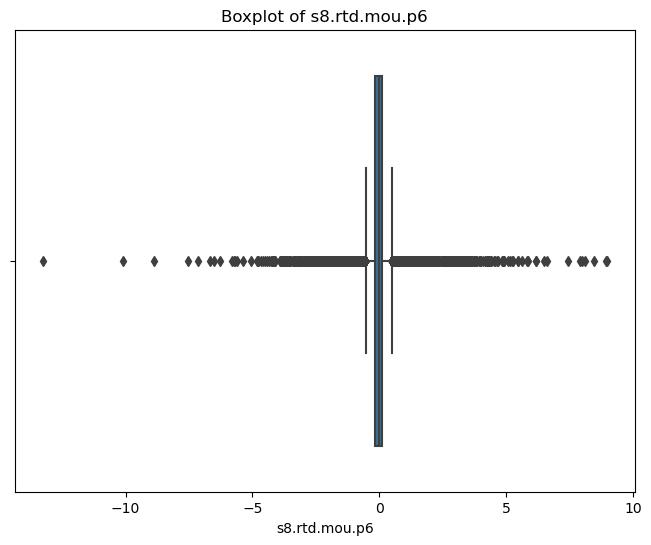

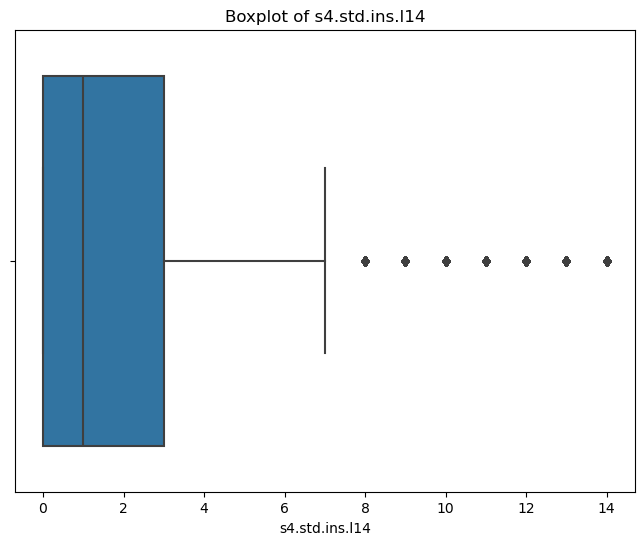

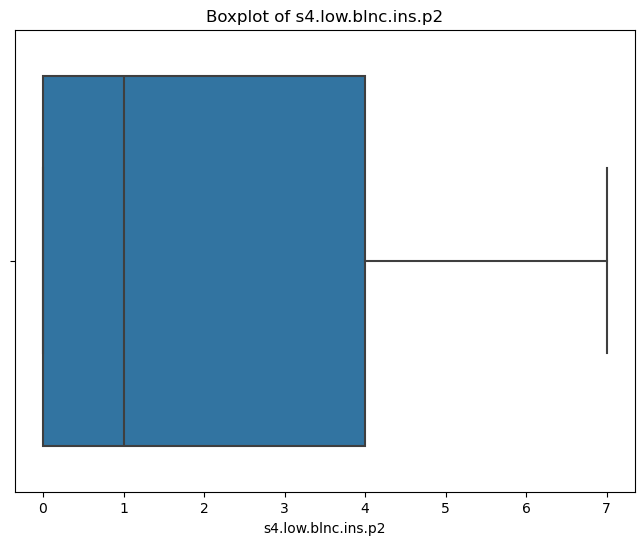

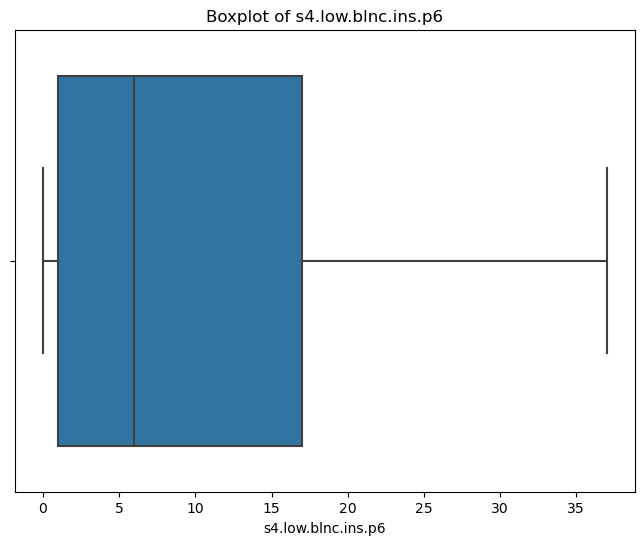

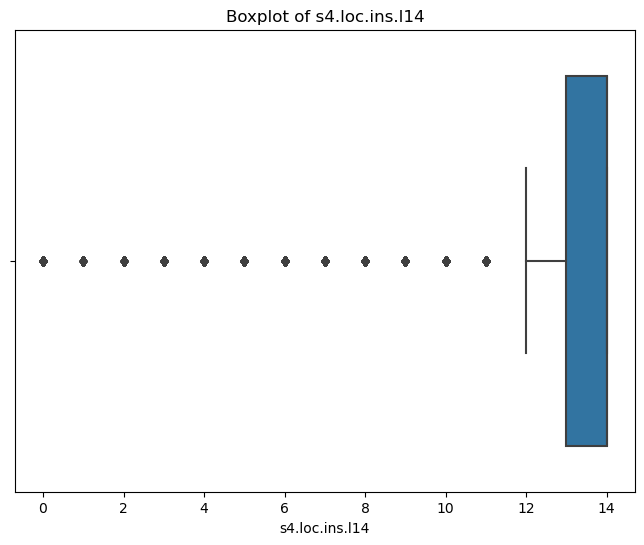

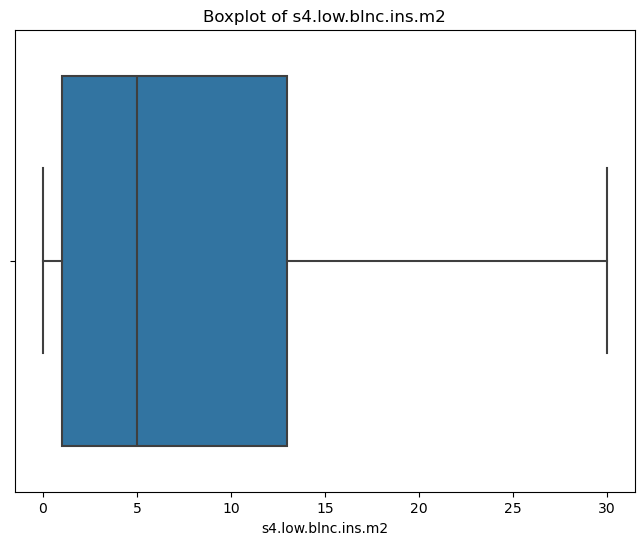

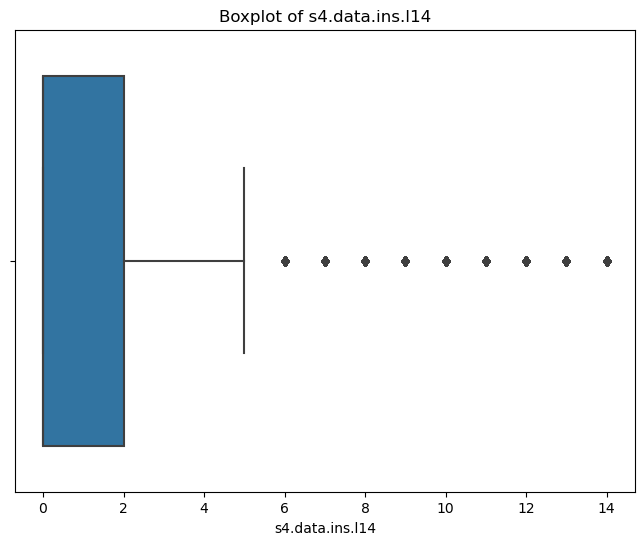

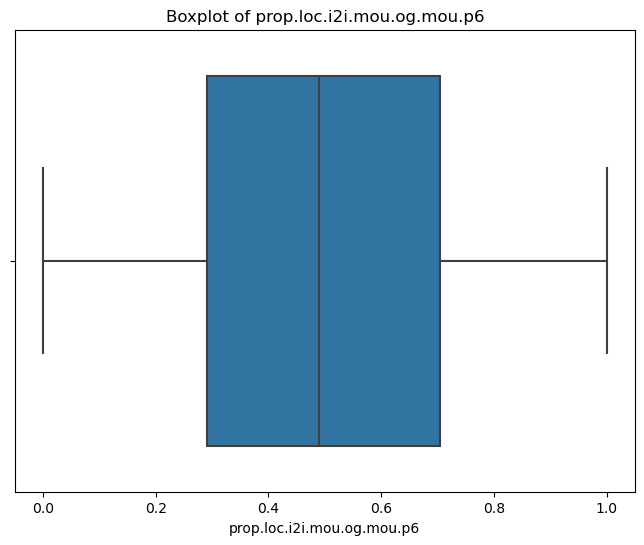

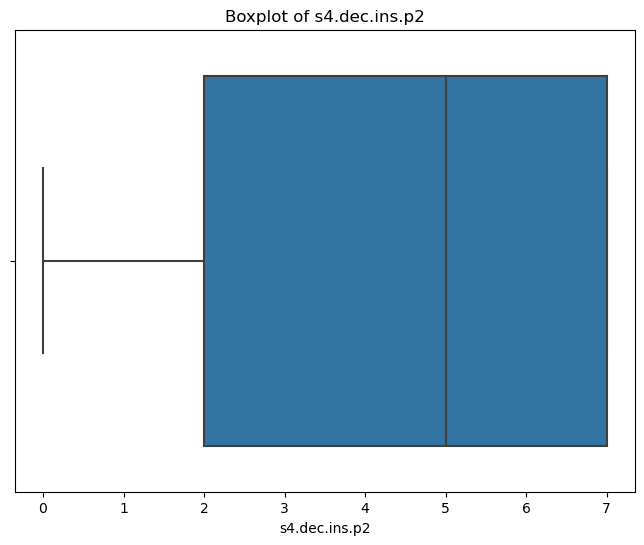

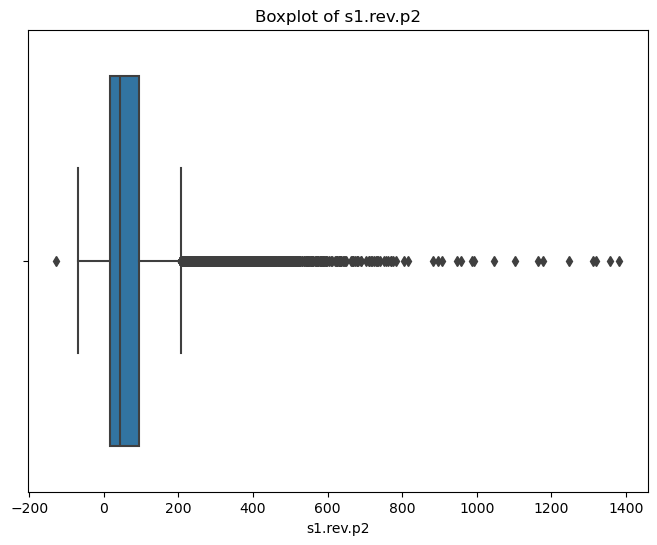

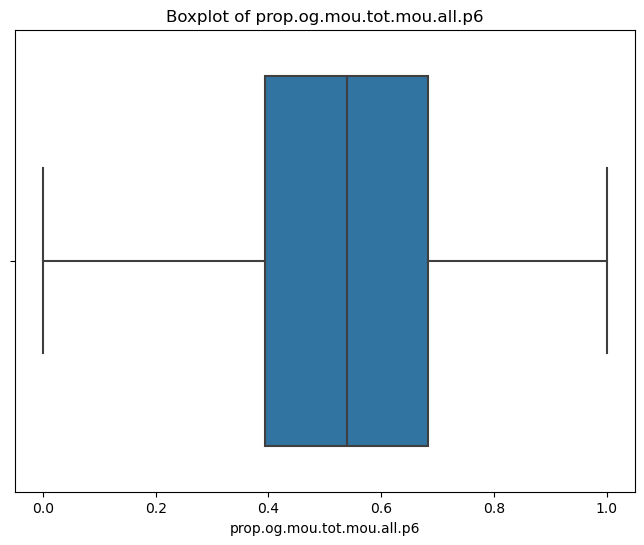

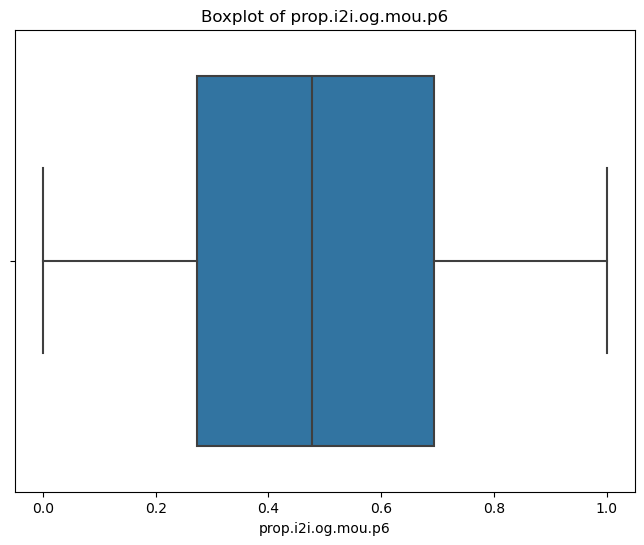

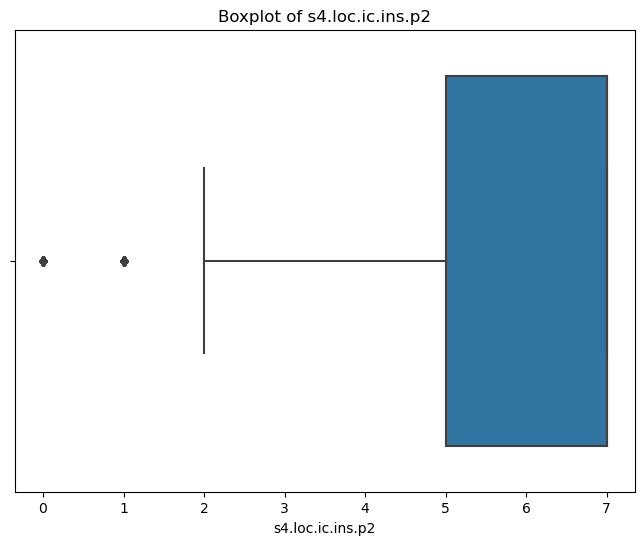

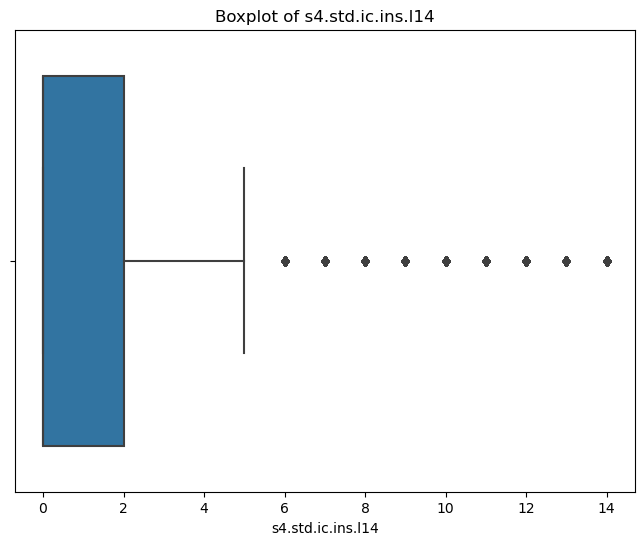

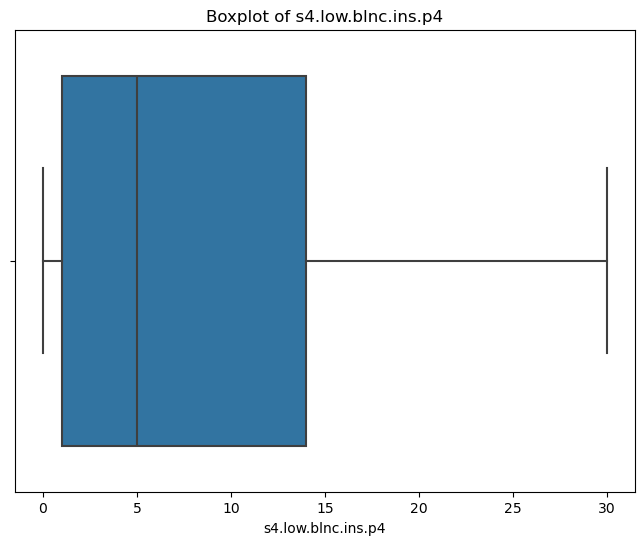

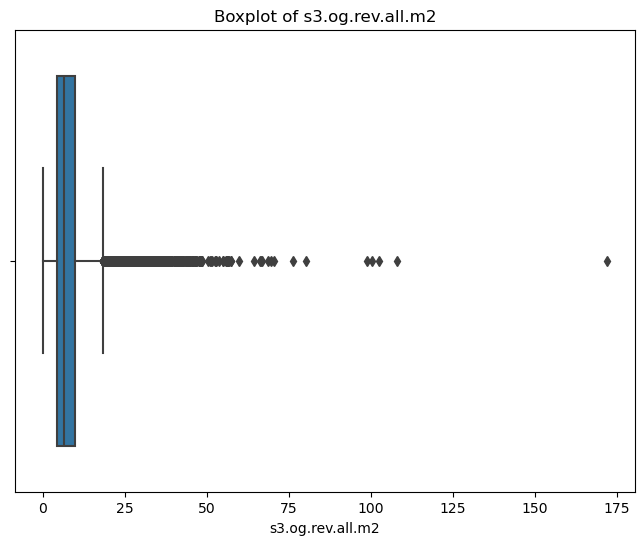

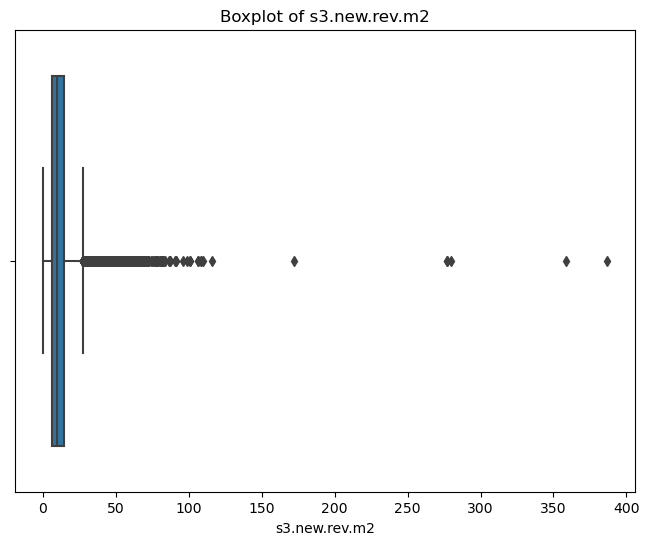

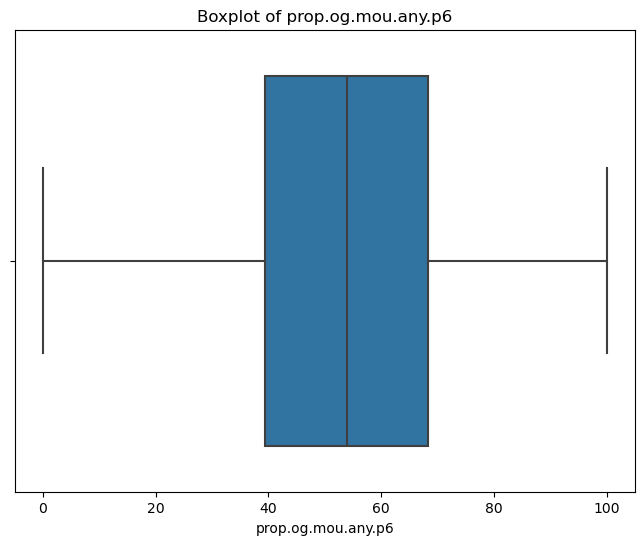

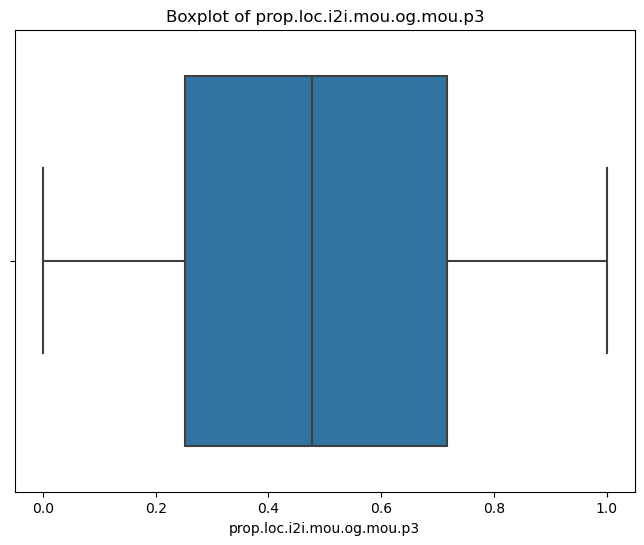

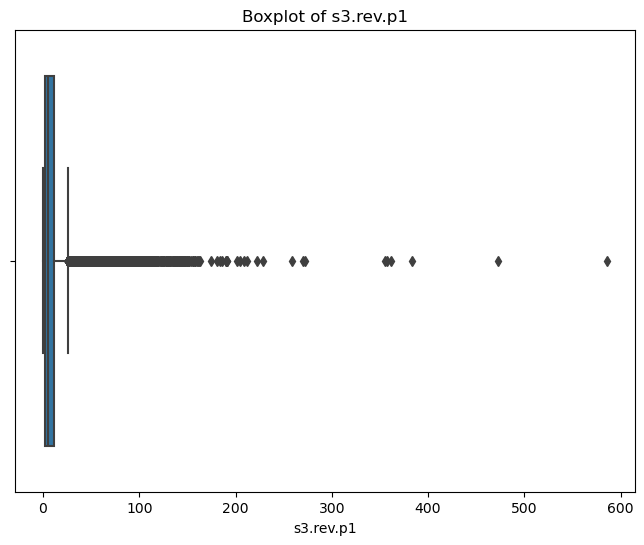

In [14]:
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot of {col}')
        plt.xlabel(col)
        plt.show()

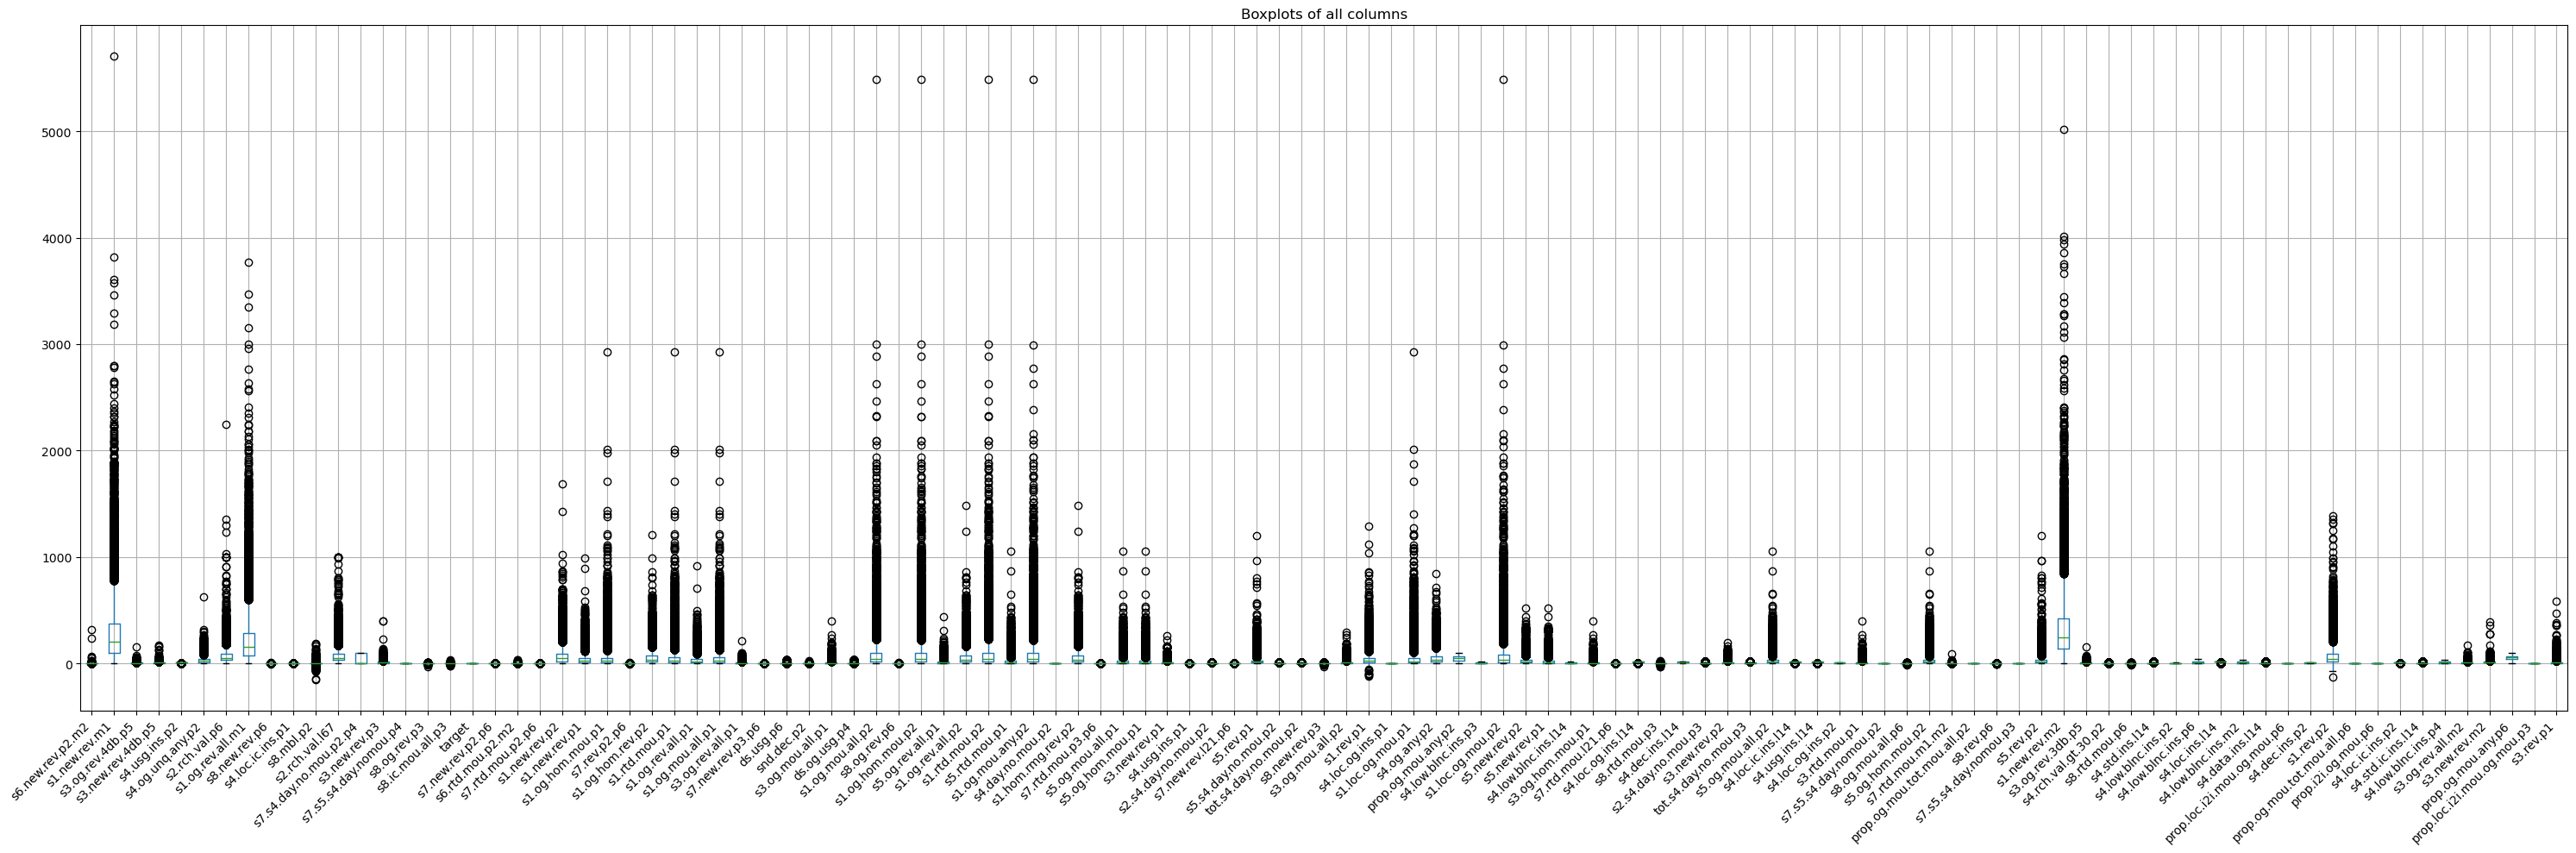

In [15]:
plt.figure(figsize=(30,10))
df.boxplot()
plt.xticks(rotation=45, ha='right')
plt.title('Boxplots of all columns')
plt.tight_layout()
plt.show()

In [16]:
#Handling Outliers using 3 sigma approach
def handle_outliers(df):
    for column in df.columns.difference(['target']):
        mean = df[column].mean()
        std_dev = df[column].std()
        upper_bound = mean + 3 * std_dev
        lower_bound = mean - 3 * std_dev
        df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
        df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

df = handle_outliers(df)

In [17]:
#correlation between variables
print(df.corr())

                            s6.new.rev.p2.m2  s1.new.rev.m1  s3.og.rev.4db.p5  \
s6.new.rev.p2.m2                    1.000000      -0.006901          0.034959   
s1.new.rev.m1                      -0.006901       1.000000          0.509467   
s3.og.rev.4db.p5                    0.034959       0.509467          1.000000   
s3.new.rev.4db.p5                   0.060425       0.547862          0.691440   
s4.usg.ins.p2                       0.390515       0.259553          0.080412   
...                                      ...            ...               ...   
s3.og.rev.all.m2                   -0.073997       0.549958          0.916013   
s3.new.rev.m2                      -0.064726       0.559701          0.535320   
prop.og.mou.any.p6                  0.031495       0.234981          0.246439   
prop.loc.i2i.mou.og.mou.p3          0.048711       0.005926         -0.074112   
s3.rev.p1                           0.281255       0.329800          0.331506   

                           

In [18]:
df[['ds.usg.p6', 'ds.og.usg.p4','target']].corr()

,ds.usg.p6,ds.og.usg.p4,target
ds.usg.p6,1.000000,0.963299,0.368604
ds.og.usg.p4,0.963299,1.000000,0.374503
target,0.368604,0.374503,1.000000


In [21]:
#dropping one as they are highly correlated
df.drop(columns=['ds.og.usg.p4'],inplace=True)

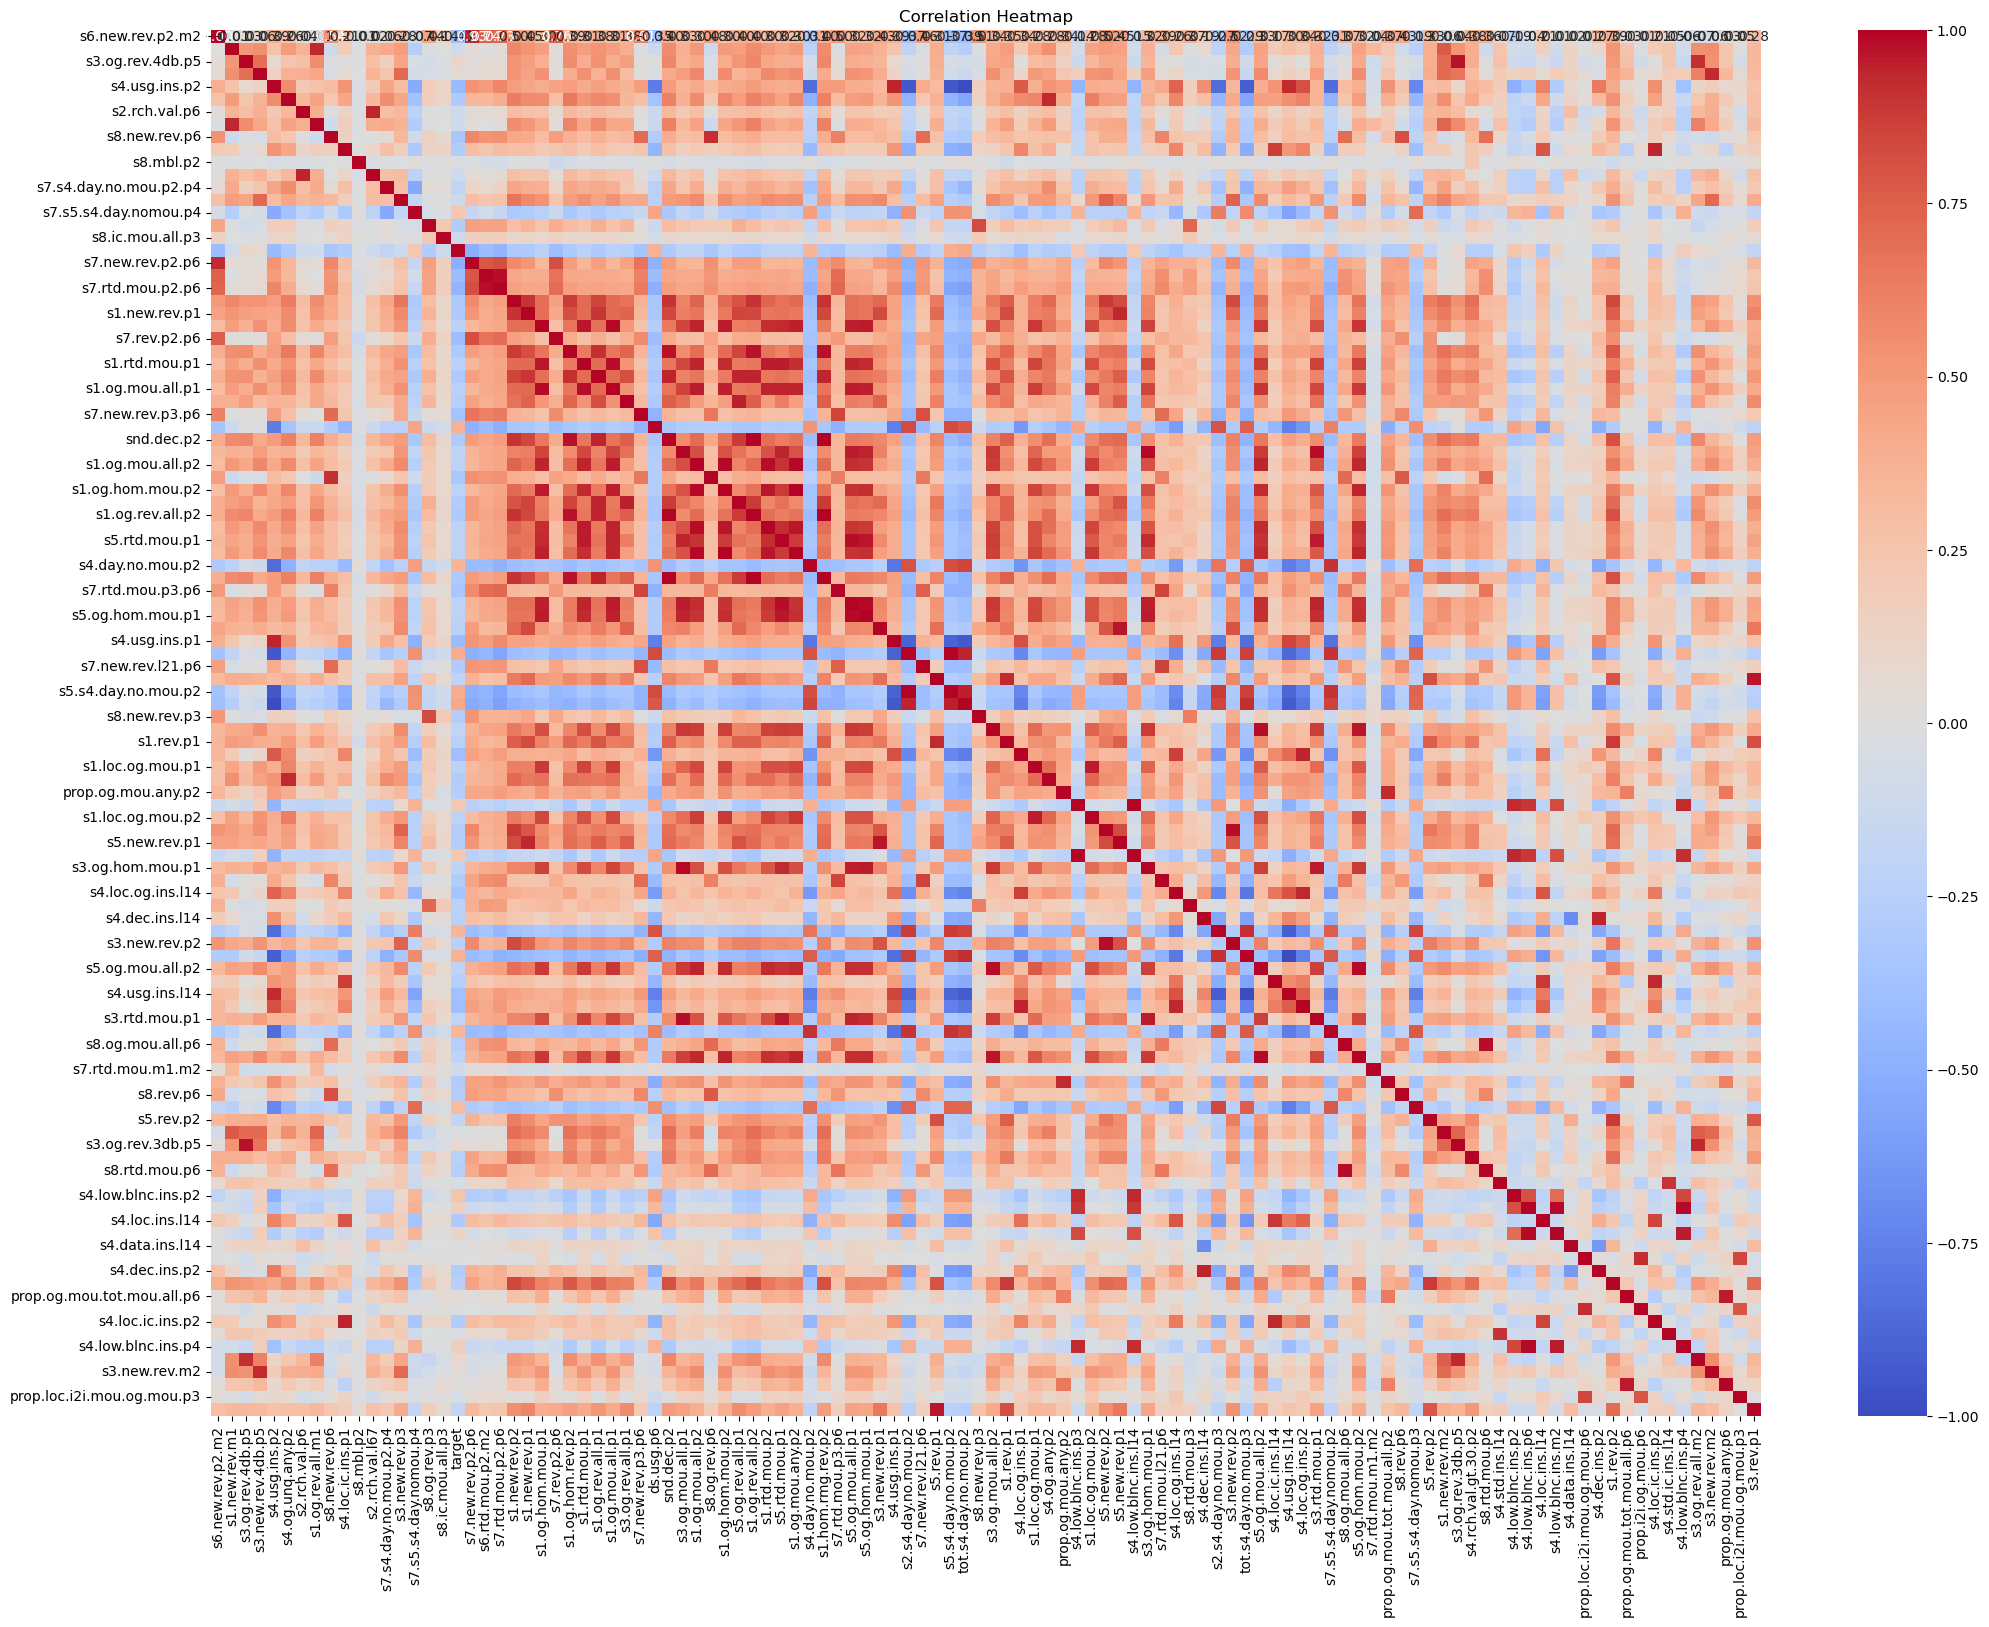

In [22]:
plt.figure(figsize=(25, 18))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [29]:
#removing highly correlated columns Threshold = 0.8
corr_mat = df.corr().abs()
cols_to_remove = set()
threshold = 0.8
for col in corr_mat.columns:
    if col in cols_to_remove:
        continue
    correlated_cols = corr_mat[col][(corr_mat[col] > threshold) & (corr_mat[col].index != col)].index.tolist()
    cols_to_remove.update(correlated_cols)
if cols_to_remove:
    df.drop(columns=cols_to_remove, inplace=True)

In [25]:
df.shape

(25000, 58)

In [30]:
print(df.columns)

Index(['s6.new.rev.p2.m2', 's1.new.rev.m1', 's3.og.rev.4db.p5',
       's3.new.rev.4db.p5', 's4.usg.ins.p2', 's4.og.unq.any.p2',
       's2.rch.val.p6', 's8.new.rev.p6', 's4.loc.ic.ins.p1', 's8.mbl.p2',
       's7.s4.day.no.mou.p2.p4', 's3.new.rev.p3', 's7.s5.s4.day.nomou.p4',
       's8.og.rev.p3', 's8.ic.mou.all.p3', 'target', 's6.rtd.mou.p2.m2',
       's1.new.rev.p2', 's1.og.hom.mou.p1', 's7.rev.p2.p6', 's3.og.rev.all.p1',
       's7.new.rev.p3.p6', 'ds.usg.p6', 's3.new.rev.p1', 's5.rev.p1',
       's4.loc.og.ins.p1', 'prop.og.mou.any.p2', 's4.low.blnc.ins.p3',
       's7.rtd.mou.l21.p6', 's8.rtd.mou.p3', 's4.dec.ins.l14',
       's8.og.mou.all.p6', 's7.rtd.mou.m1.m2', 's7.s5.s4.day.nomou.p3',
       's1.new.rev.m2', 's4.rch.val.gt.30.p2', 's4.std.ins.l14',
       's4.loc.ins.l14', 's4.data.ins.l14', 'prop.loc.i2i.mou.og.mou.p6',
       'prop.og.mou.tot.mou.all.p6'],
      dtype='object')


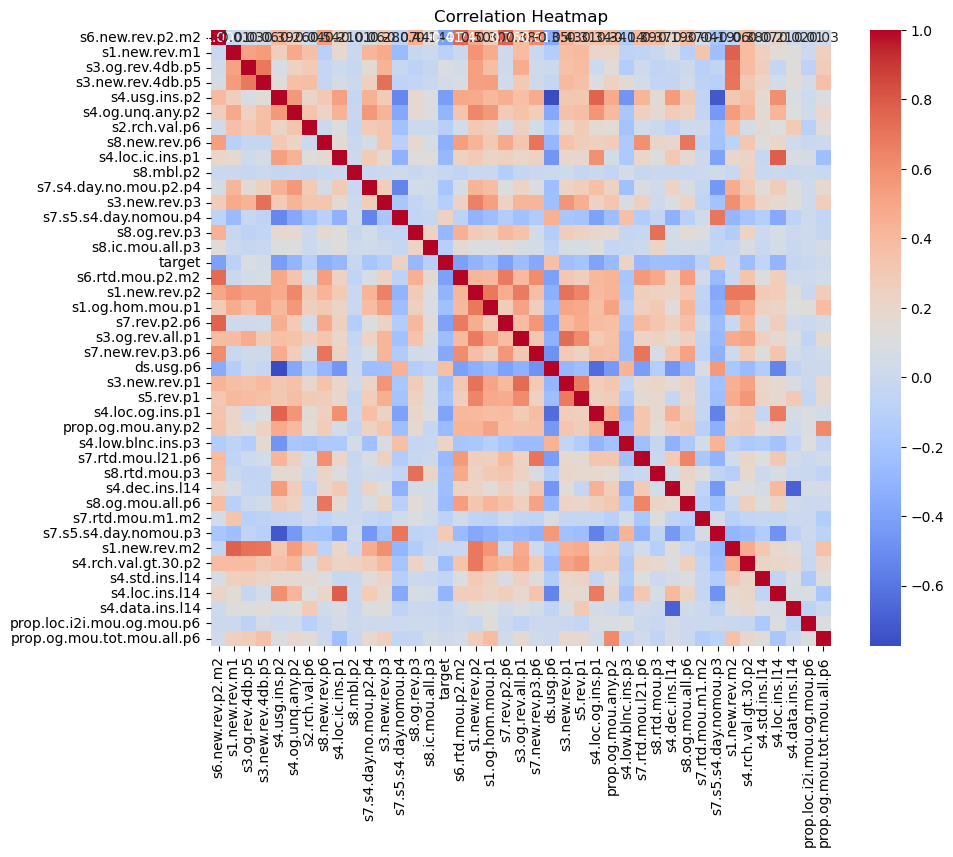

In [31]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [32]:
#Multicollinearity VIF > 20
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = df.drop('target',axis=1)
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
high_vif = vif[vif['VIF'] > 20]
print(len(high_vif))
print(high_vif.sort_values(by = 'VIF', ascending = False))

10
                       Feature        VIF
36              s4.loc.ins.l14  78.680555
4                s4.usg.ins.p2  47.801860
29              s4.dec.ins.l14  38.081067
33               s1.new.rev.m2  31.728058
20            s7.new.rev.p3.p6  28.312769
27           s7.rtd.mou.l21.p6  27.627121
8             s4.loc.ic.ins.p1  26.543303
24            s4.loc.og.ins.p1  21.423763
16               s1.new.rev.p2  20.131413
39  prop.og.mou.tot.mou.all.p6  20.122214


In [33]:
df = df.drop(high_vif['Feature'],axis = 1)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   s6.new.rev.p2.m2            25000 non-null  float64
 1   s1.new.rev.m1               25000 non-null  float64
 2   s3.og.rev.4db.p5            25000 non-null  float64
 3   s3.new.rev.4db.p5           25000 non-null  float64
 4   s4.og.unq.any.p2            25000 non-null  float64
 5   s2.rch.val.p6               25000 non-null  float64
 6   s8.new.rev.p6               25000 non-null  float64
 7   s8.mbl.p2                   25000 non-null  float64
 8   s7.s4.day.no.mou.p2.p4      25000 non-null  float64
 9   s3.new.rev.p3               25000 non-null  float64
 10  s7.s5.s4.day.nomou.p4       25000 non-null  float64
 11  s8.og.rev.p3                25000 non-null  float64
 12  s8.ic.mou.all.p3            25000 non-null  float64
 13  target                      250

In [35]:
X = df.drop('target', axis=1)
y = df['target']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [37]:
train_pred = clf.predict(X_train)
test_pred = clf.predict(X_test)

train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)

print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)

Train Accuracy: 1.0
Test Accuracy: 0.7208


In [38]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [5, 10, 15, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [39]:
best_params = grid_search.best_params_
best_clf = DecisionTreeClassifier(**best_params)
best_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [41]:
train_pred = best_clf.predict(X_train)
test_pred = best_clf.predict(X_test)

train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)

print("Train Accuracy after Pruning:", train_acc)
print("Test Accuracy after Pruning:", test_acc)

Train Accuracy after Pruning: 0.7975
Test Accuracy after Pruning: 0.7988
